In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import seaborn as sns
import plotly.express as px

%matplotlib inline

In [ ]:
# Set DPI for fugures

plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

In [ ]:
plt.rcParams['font.size'] = 20

In [ ]:
# Drive connection

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Importing Dataset
train = pd.read_csv('/content/drive/Shareddrives/Best Shared Drive Ever/EEG/AMIGO data/Pre-processed/train_data.csv')
test = pd.read_csv('/content/drive/Shareddrives/Best Shared Drive Ever/EEG/AMIGO data/Pre-processed/test_data.csv')

In [ ]:
train.shape

(188160, 89)

In [ ]:
test.shape

(62720, 89)

In [ ]:
train.isnull().sum()

C1B1       7644
C1B2       7644
C1B3       7644
C1B4       7644
C1B5       7644
           ... 
C17B5         0
Arousal       0
Valence       0
Domain        0
Like          0
Length: 89, dtype: int64

In [ ]:
test.isnull().sum()

C1B1       2548
C1B2       2548
C1B3       2548
C1B4       2548
C1B5       2548
           ... 
C17B5         0
Arousal       0
Valence       0
Domain        0
Like          0
Length: 89, dtype: int64

In [ ]:
train = train.dropna()

In [ ]:
test = test.dropna()

In [ ]:
train.head()

C1B1         C1B2         C1B3         C1B4         C1B5  \
0   6032.203963  2070.106768  1216.516945  1815.165930  3635.199393   
1   6142.135007  2030.895795  1153.623524  2077.361498  3713.130490   
2   6296.919958  2380.719155  1421.533980  1952.494141  3597.429572   
3  10000.558570  3363.297736  1624.655444  1973.876819  3832.957613   
4   9719.016680  3694.085977  1644.394209  2060.945607  3694.681667   

          C2B1         C2B2         C2B3         C2B4         C2B5  ...  \
0  3694.507097  3574.162875  1756.016202  1854.715241  3149.295394  ...   
1  3333.081405  3985.270762  1860.136153  1945.039398  3113.481458  ...   
2  3594.164016  3917.440527  1835.355634  1927.584364  3028.631835  ...   
3  4058.075393  3925.681549  1628.863343  1966.655184  2748.728588  ...   
4  4060.729325  3958.866961  1593.665632  1932.627872  2773.597316  ...   

         C16B5          C17B1          C17B2          C17B3          C17B4  \
0  1720.707369  547315.633702  310068.766287  226399.935106  345957.859101   
1  1819.429765  558432.194247  314105.068011  211560.654028  352018.931210   
2  1954.686576  533942.531541  305481.956277  216017.257502  361309.107362   
3  1805.377073  469186.611218  259972.530560  200458.913917  294224.621002   
4  1829.290434  388124.548374  250176.157520  176183.793844  266066.352785   

           C17B5   Arousal  Valence    Domain  Like  
0  536622.950865  2.938568      5.0  8.235496   1.0  
1  499136.097421  2.938568      5.0  8.235496   1.0  
2  508258.405326  2.938568      5.0  8.235496   1.0  
3  455248.659617  2.938568      5.0  8.235496   1.0  
4  334513.743213  2.938568      5.0  8.235496   1.0  

[5 rows x 89 columns]

In [ ]:
test.head()

C1B1         C1B2         C1B3         C1B4         C1B5  \
0   5905.959753  2070.040811  1215.706842  1877.159163  3625.204684   
1  10598.914611  2828.407723  1817.596337  2067.592585  3603.658562   
2   7903.212190  3138.369867  1474.830059  2025.005074  3425.838515   
3   7333.358950  3244.169799  1102.794590  1792.676166  3170.133154   
4   7153.631253  3443.266727  1148.815455  1635.656834  3231.702618   

          C2B1         C2B2         C2B3         C2B4         C2B5  ...  \
0  3339.339978  2780.360546  1606.427979  1689.590342  3111.266306  ...   
1  4317.093150  3914.390669  2037.732159  2320.173290  2826.949288  ...   
2  3353.876582  3465.418791  1110.094683  1809.391153  2827.147842  ...   
3  2819.093186  3377.115862   942.251464  1548.804230  2548.488091  ...   
4  3540.456942  3398.469036  1542.445171  1668.033331  2555.090823  ...   

         C16B5          C17B1          C17B2          C17B3          C17B4  \
0  1859.444922  538807.587443  311072.729544  230188.786654  345688.278610   
1  1823.168860  511358.217383  293883.524092  211108.816554  324891.872104   
2  1863.158266  289126.192122  169049.709989  122940.242665  188470.107699   
3  1410.621547  130291.882646   82223.649706   63329.477139   96900.825947   
4  1550.332291   70025.305656   56228.433287   36260.840820   87984.780359   

           C17B5   Arousal  Valence    Domain  Like  
0  499555.974602  2.938568      5.0  8.235496   1.0  
1  514410.013827  2.938568      5.0  8.235496   1.0  
2  283355.066376  2.938568      5.0  8.235496   1.0  
3  206307.432368  2.938568      5.0  8.235496   1.0  
4  205779.557403  2.938568      5.0  8.235496   1.0  

[5 rows x 89 columns]

In [ ]:
train.shape

(177282, 89)

In [ ]:
test.shape

(59094, 89)

In [ ]:
# Rename the column 'Dominance' to 'Dominancencoded_e'
train.rename(columns={'Domain': 'Dominance'}, inplace=True)
test.rename(columns={'Domain': 'Dominance'}, inplace=True)

<ipython-input-302-e6ef128ed694>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.rename(columns={'Domain': 'Dominance'}, inplace=True)
<ipython-input-302-e6ef128ed694>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.rename(columns={'Domain': 'Dominance'}, inplace=True)


In [ ]:
# Rename the column 'Liking' to 'Liking'
train.rename(columns={'Like': 'Liking'}, inplace=True)
test.rename(columns={'Like': 'Liking'}, inplace=True)

<ipython-input-303-4a264b00db60>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.rename(columns={'Like': 'Liking'}, inplace=True)
<ipython-input-303-4a264b00db60>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.rename(columns={'Like': 'Liking'}, inplace=True)


### Two class

In [ ]:
# Copy the original dataset
encoded_train = train.copy()

# List of columns to modify
# columns_to_modify = ['Valence', 'Arousal', 'Dominance', 'Liking']
columns_to_modify = ['Valence']

# Apply the transformation: 1-4.99 becomes 0, everything else becomes 1
encoded_train[columns_to_modify] = encoded_train[columns_to_modify].applymap(
    lambda x: 0 if 1 <= x <= 4.99 else 1
)

<ipython-input-304-71f80eed8014>:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  encoded_train[columns_to_modify] = encoded_train[columns_to_modify].applymap(


In [ ]:
# Replace 9 with 8.99 in specified columns
columns_to_update = ['Arousal', 'Dominance', 'Liking']
encoded_train[columns_to_update] = encoded_train[columns_to_update].replace(9, 8.99)

In [ ]:
# Copy
encoded_test = test.copy()

# List of columns to modify
#columns_to_modify = ['Valence', 'Arousal', 'Dominance', 'Liking']
columns_to_modify = ['Valence']

# Apply the transformation: 1-4.99 becomes 0, 5-9 becomes 1
encoded_test[columns_to_modify] = encoded_test[columns_to_modify].applymap(
    lambda x: 0 if 1 <= x <= 4.99 else 1
)

<ipython-input-306-874960b9dd8c>:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  encoded_test[columns_to_modify] = encoded_test[columns_to_modify].applymap(


In [ ]:
# Replace 9 with 8.99 in specified columns
columns_to_update = ['Arousal', 'Dominance', 'Liking']
encoded_test[columns_to_update] = encoded_test[columns_to_update].replace(9, 8.99)

## Train-Test Split

### Valence

In [ ]:
# Labeling
X_train = encoded_train[['C1B1', 'C1B2', 'C1B3', 'C1B4', 'C1B5', 'C2B5', 'C4B5', 'C5B1', 'C5B2', 'C5B3', 'C5B4', 'C5B5', 'C6B1', 'C6B2', 'C6B3', 'C6B4', 'C6B5', 'C9B4', 'C9B5', 'C11B2', 'C11B4', 'C11B5', 'C12B1', 'C12B2', 'C12B3', 'C12B4', 'C12B5', 'C13B1', 'C13B3', 'C15B1', 'C15B5', 'C16B5']]
Y_train = encoded_train['Valence'] # Target label

x_test = encoded_test[['C1B1', 'C1B2', 'C1B3', 'C1B4', 'C1B5', 'C2B5', 'C4B5', 'C5B1', 'C5B2', 'C5B3', 'C5B4', 'C5B5', 'C6B1', 'C6B2', 'C6B3', 'C6B4', 'C6B5', 'C9B4', 'C9B5', 'C11B2', 'C11B4', 'C11B5', 'C12B1', 'C12B2', 'C12B3', 'C12B4', 'C12B5', 'C13B1', 'C13B3', 'C15B1', 'C15B5', 'C16B5']]
y_test = encoded_test['Valence'] # Target label

In [ ]:
# Train Count
print(Y_train.value_counts())

Valence
1    100254
0     77028
Name: count, dtype: int64


In [ ]:
# Train Count
print(y_test.value_counts())

Valence
1    33418
0    25676
Name: count, dtype: int64


# Deep Learning Model

In [ ]:
# Fit the train and test data with StandarScaler

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
x_test = scaler.fit_transform(x_test)

In [ ]:
from tensorflow.keras.utils import to_categorical

# Reshape the input data
X_train = np.expand_dims(X_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

# One-hot encode the labels
Y_train = to_categorical(Y_train, num_classes=2)
y_test = to_categorical(y_test, num_classes=2)

## Proposed

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_7       │ (None, 32, 1)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_84 (Conv1D)  │ (None, 32, 32)    │        224 │ input_layer_7[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32, 32)    │        128 │ conv1d_84[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_56       │ (None, 32, 32)    │          0 │ batch_normalizat… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_85 (Conv1D)  │ (None, 32, 32)    │      6,176 │ activation_56[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_86 (Conv1D)  │ (None, 32, 32)    │         64 │ input_layer_7[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32, 32)    │        128 │ conv1d_85[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_28 (Add)        │ (None, 32, 32)    │          0 │ conv1d_86[0][0],  │
│                     │                   │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_57       │ (None, 32, 32)    │          0 │ add_28[0][0]      │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_28    │ (None, 16, 32)    │          0 │ activation_57[0]… │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_87 (Conv1D)  │ (None, 16, 64)    │     12,352 │ max_pooling1d_28… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 16, 64)    │        256 │ conv1d_87[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_58       │ (None, 16, 64)    │          0 │ batch_normalizat… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_88 (Conv1D)  │ (None, 16, 64)    │     24,640 │ activation_58[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_89 (Conv1D)  │ (None, 16, 64)    │      2,112 │ max_pooling1d_28… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 16, 64)    │        256 │ conv1d_88[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_29 (Add)        │ (None, 16, 64)    │          0 │ conv1d_89[0][0],  │
│                     │                   │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_59       │ (None, 16, 64)    │          0 │ add_29[0][0]      │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_29    │ (None, 8, 64)     │          0 │ activation_59[0]

 Total params: 904,866 (3.45 MB)

 Trainable params: 902,946 (3.44 MB)

 Non-trainable params: 1,920 (7.50 KB)

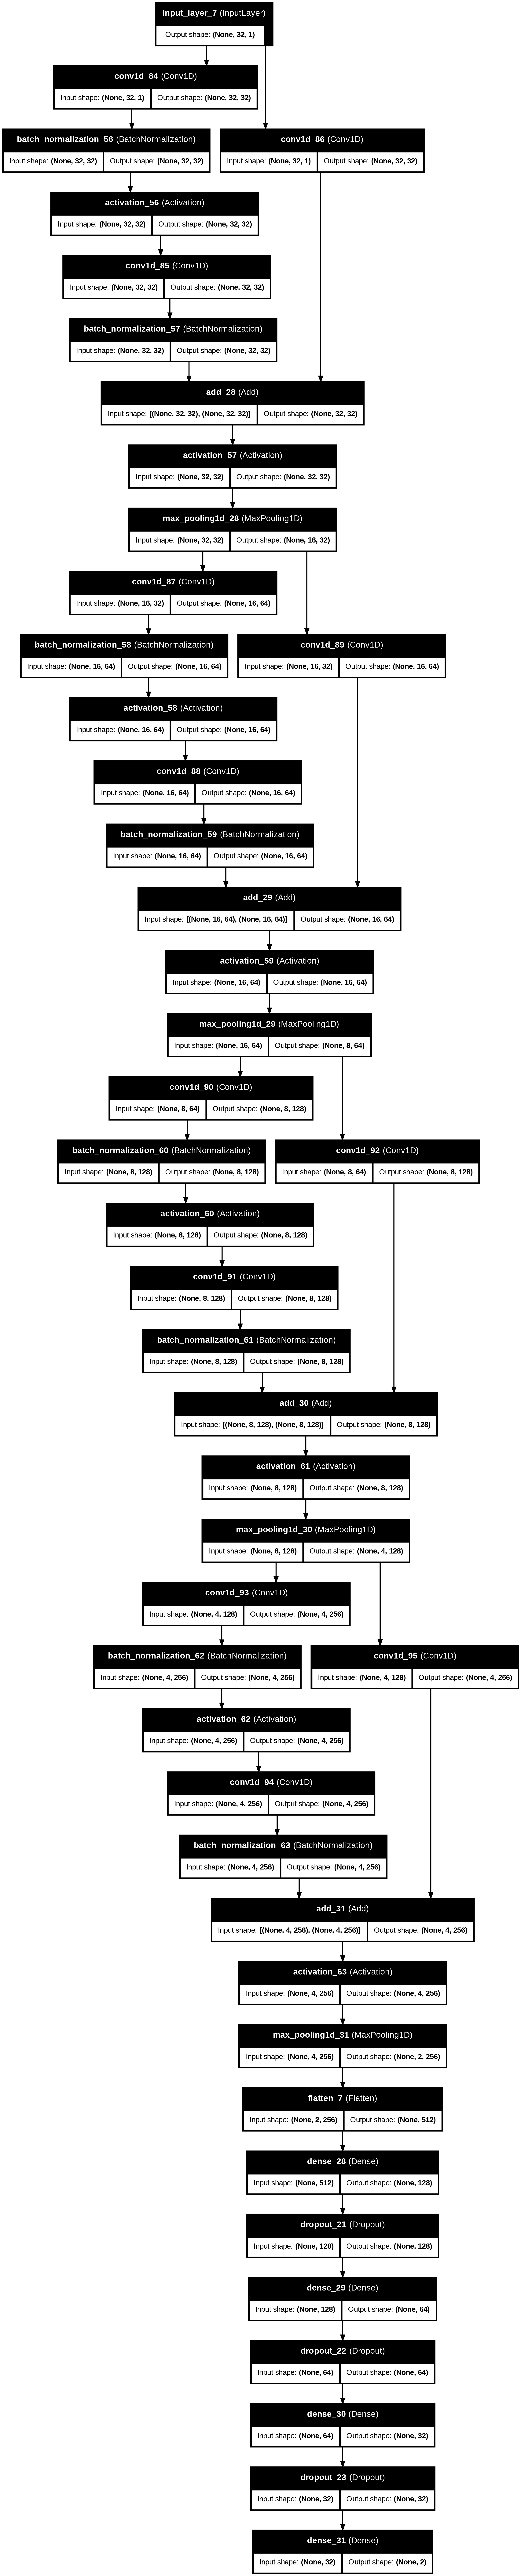

In [ ]:
from keras.layers import Input, Conv1D, BatchNormalization, MaxPooling1D, Flatten, Dense, Dropout, concatenate, Add, Activation
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import plot_model

# Input shape
input_shape = (X_train.shape[1], 1)

# Input layer
input_layer = Input(input_shape)

# Residual block function
def residual_block(x, filters, kernel_size, pool_size=2):
    shortcut = x
    conv = Conv1D(filters, kernel_size, padding='same', activation=None)(x)
    conv = BatchNormalization()(conv)
    conv = Activation('relu')(conv)
    conv = Conv1D(filters, kernel_size, padding='same', activation=None)(conv)
    conv = BatchNormalization()(conv)
    shortcut = Conv1D(filters, 1, padding='same', activation=None)(shortcut)  # Adjust dimensions
    x = Add()([shortcut, conv])
    x = Activation('relu')(x)
    x = MaxPooling1D(pool_size)(x)
    return x

# Build residual blocks
x = residual_block(input_layer, 32, 6)
x = residual_block(x, 64, 6)
x = residual_block(x, 128, 6)
x = residual_block(x, 256, 6)

# Global average pooling for better generalization
gap = Flatten()(x)

# Fully connected layers
dense1 = Dense(128, activation='relu')(gap)
drop1 = Dropout(0.25)(dense1)

dense2 = Dense(64, activation='relu')(drop1)
drop2 = Dropout(0.25)(dense2)

dense3 = Dense(32, activation='relu')(drop2)
drop3 = Dropout(0.25)(dense3)

# Output layer
output_layer = Dense(2, activation='softmax')(drop3)

# Build the model
model = Model(input_layer, output_layer)
model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model summary
model.summary()

# Plot the model architecture
plot_model(model, to_file='enhanced_model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
from tensorflow import keras

# Compile the model
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
# check points and early stopping
from keras.callbacks import ModelCheckpoint,EarlyStopping

model_name = "CNN"
filepath = "/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/EEG-Brain/AMIGO/Ideal/Model/History/" + model_name + "weights-improvement-{epoch:02d}-{accuracy:.4f}.keras"
print(filepath)
checkpoint = ModelCheckpoint(filepath, monitor='accuracy', verbose=1, save_best_only=True, mode='max')
es = EarlyStopping(monitor='accuracy', mode='max', verbose=1, patience=10)
callbacks_list = [es, checkpoint]

/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/EEG-Brain/AMIGO/Ideal/Model/History/CNNweights-improvement-{epoch:02d}-{accuracy:.4f}.keras


In [ ]:

# Train the model
H = model.fit(X_train, Y_train,
          batch_size=100,
          epochs=100,
          verbose=1,
          validation_data=(x_test, y_test),
          callbacks= callbacks_list)


Epoch 1/100
1773/1773 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6235 - loss: 0.6342
Epoch 1: accuracy improved from -inf to 0.68095, saving model to /content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/EEG-Brain/AMIGO/Ideal/Model/History/CNNweights-improvement-01-0.6810.keras
1773/1773 ━━━━━━━━━━━━━━━━━━━━ 35s 13ms/step - accuracy: 0.6235 - loss: 0.6341 - val_accuracy: 0.7508 - val_loss: 0.5098
Epoch 2/100
1765/1773 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7831 - loss: 0.4485
Epoch 2: accuracy improved from 0.68095 to 0.79812, saving model to /content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/EEG-Brain/AMIGO/Ideal/Model/History/CNNweights-improvement-02-0.7981.keras
1773/1773 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7832 - loss: 0.4484 - val_accuracy: 0.8360 - val_loss: 0.3568
Epoch 3/100
1770/1773 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8416 - loss: 0.3500
Epoch 3: accuracy improved from 0.79812 to 0.84966, saving model to /content

In [ ]:

from keras.models import save_model

model.save("/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/EEG-Brain/AMIGO/Ideal/Model/model.h5")


In [ ]:
from keras.models import load_model

model_loaded = load_model("/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/EEG-Brain/AMIGO/Ideal/Model/model.h5")

In [ ]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=1)

# Print the test accuracy
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

1847/1847 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9691 - loss: 0.1707
Test Accuracy: 96.75%


In [ ]:
score = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

1847/1847 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9691 - loss: 0.1707
Test loss: 0.17382431030273438
Test accuracy: 0.9674755334854126


In [ ]:
from sklearn.metrics import accuracy_score

# Get model predictions
y_pred = model_loaded.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class predictions
y_true = np.argmax(y_test, axis=1)          # Convert one-hot encoded labels to class indices

# Compute accuracy for each class
class_accuracies = {}
for class_label in np.unique(y_true):
    indices = np.where(y_true == class_label)
    class_accuracy = accuracy_score(y_true[indices], y_pred_classes[indices])
    class_accuracies[class_label] = class_accuracy

# Print the test accuracies
for class_label, accuracy in class_accuracies.items():
    print(f'Test Accuracy for Class {class_label}: {accuracy * 100:.2f}%')

1847/1847 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step
Test Accuracy for Class 0: 95.85%
Test Accuracy for Class 1: 97.44%


In [ ]:

import pickle

# Specify the correct file path
history_file_path = '/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/EEG-Brain/AMIGO/Ideal/Model/History/history.pkl'

# Save the model history to the file
with open(history_file_path, 'wb') as file_pi:
    pickle.dump(H, file_pi)


In [ ]:
import pickle

# Correct path with file name and extension
history_filepath = '/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/EEG-Brain/AMIGO/Ideal/Model/History/history.pkl'

# Load the history from the file
with open(history_filepath, 'rb') as file:
    load_history = pickle.load(file)

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 50 variables whereas the saved optimizer has 98 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


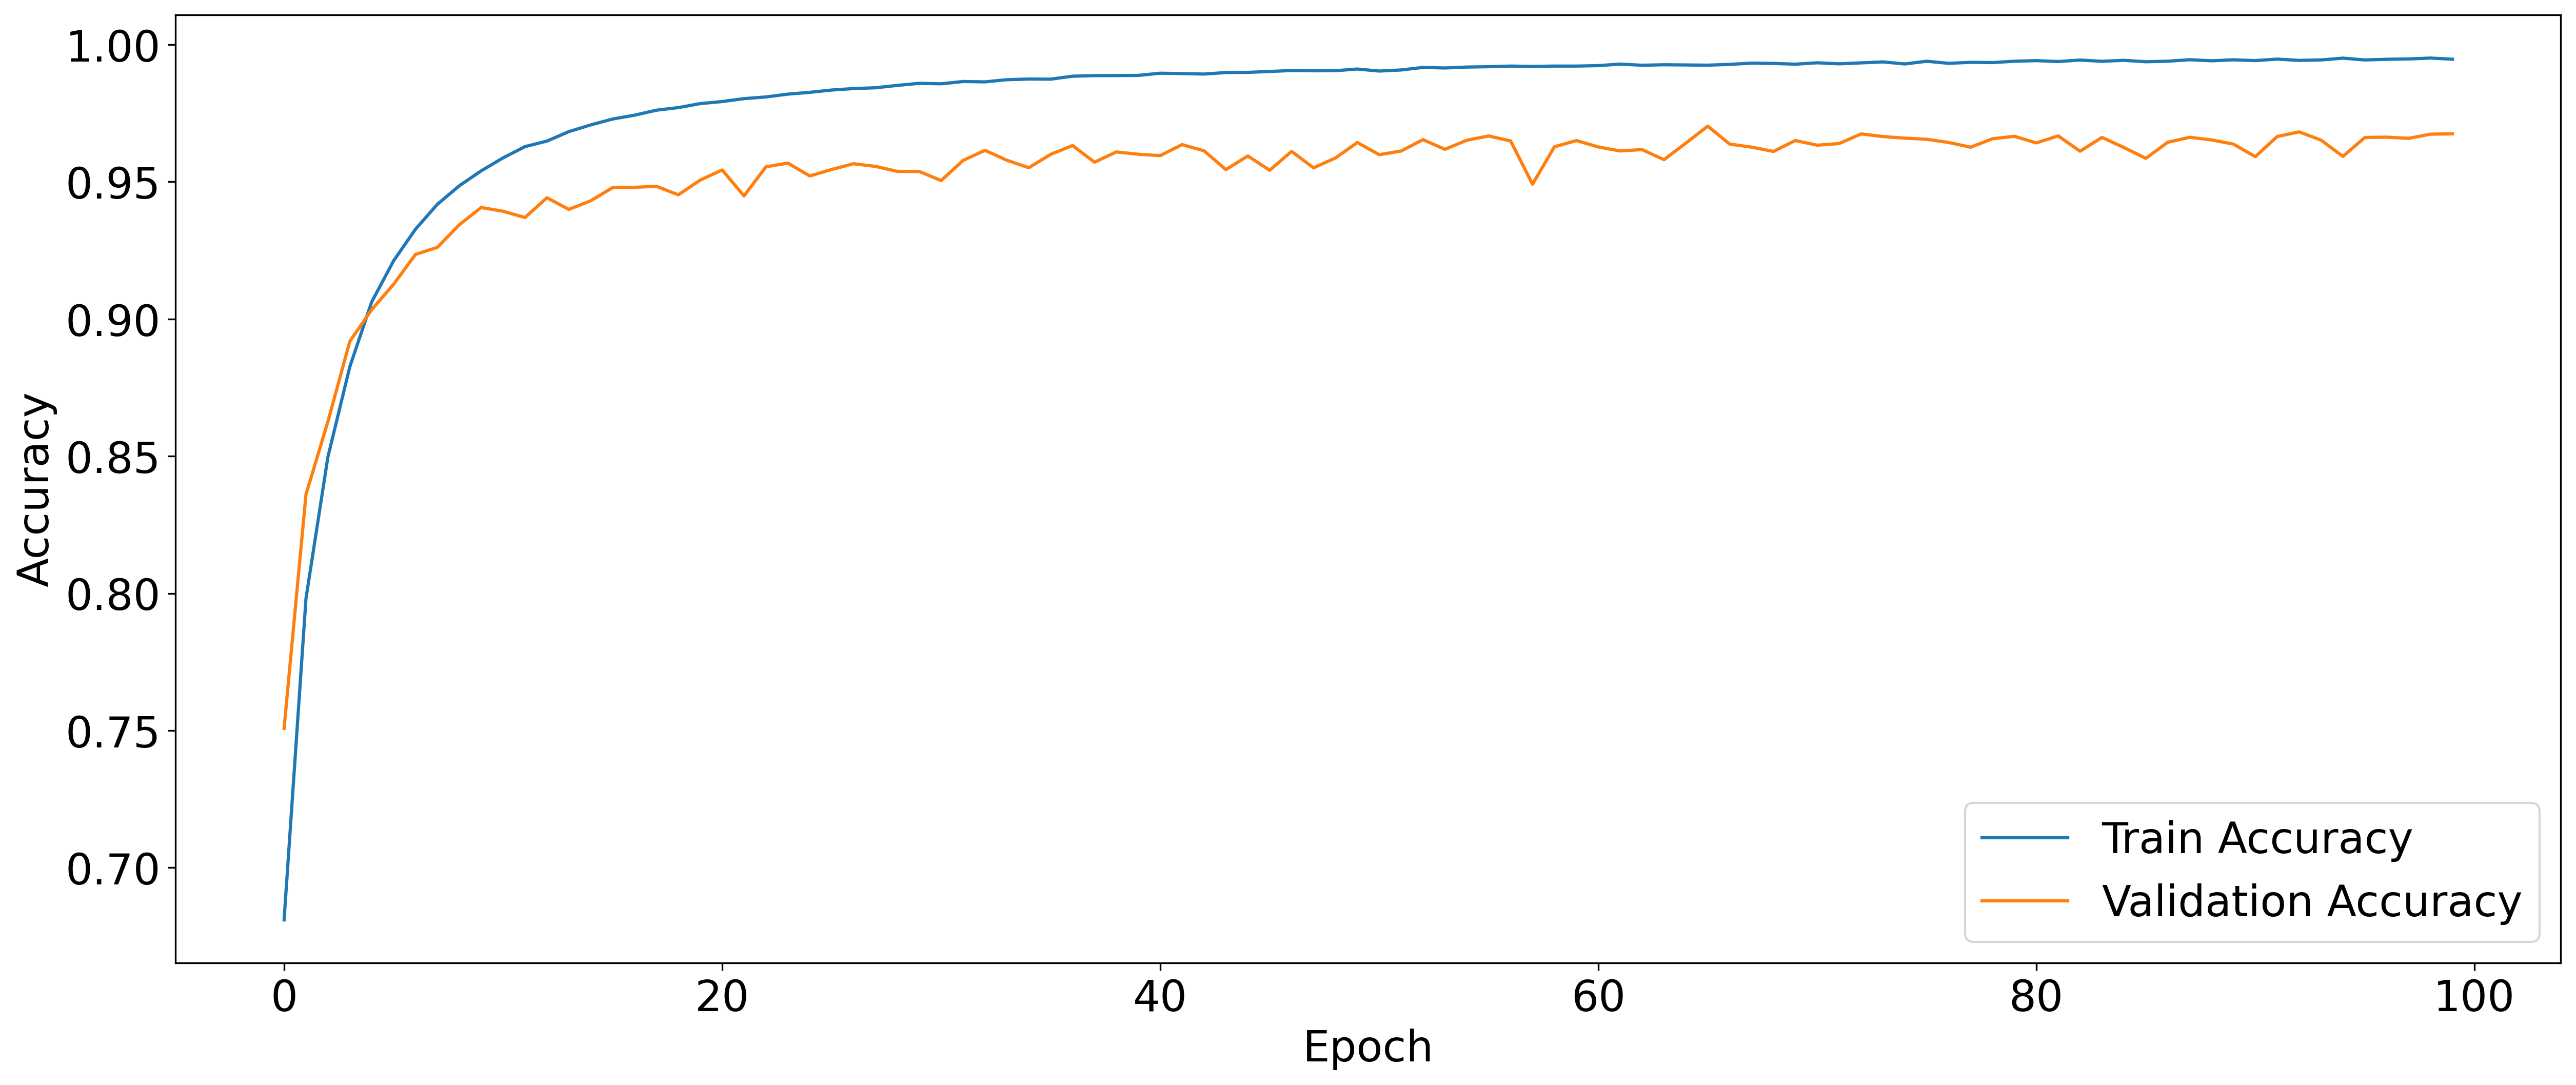

In [ ]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (20, 8)
plt.rcParams["font.size"] = 20

# Access accuracy and validation accuracy using the 'history' attribute
plt.plot(load_history.history['accuracy'], label='Train Accuracy')
plt.plot(load_history.history['val_accuracy'], label='Validation Accuracy')

#plt.title('CNN Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.show()

In [ ]:
from keras.models import load_model

model_loaded = load_model("/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/EEG-Brain/AMIGO/Ideal/Model/model.h5")

In [ ]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Define the number of bootstrap iterations
n_bootstraps = 10
confidence_level = 0.95

# Function to calculate confidence intervals
def calculate_confidence_interval(data, confidence=0.95):
    lower_percentile = (1 - confidence) / 2 * 100
    upper_percentile = (1 + confidence) / 2 * 100
    lower_bound = np.percentile(data, lower_percentile)
    upper_bound = np.percentile(data, upper_percentile)
    return lower_bound, upper_bound

# Perform bootstrap
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

for _ in range(n_bootstraps):
    # Resample with replacement from the test set
    indices = np.random.choice(range(len(x_test)), size=len(x_test), replace=True)
    x_resampled = x_test[indices]
    y_resampled = y_test[indices]

    # Make predictions on the resampled data
    predictions = model_loaded.predict(x_resampled)
    y_pred = np.argmax(predictions, axis=1)  # Convert to class labels if needed

    # Ensure y_resampled is also in label format (convert if necessary)
    if y_resampled.ndim > 1 and y_resampled.shape[1] > 1:  # If one-hot encoded
        y_resampled = np.argmax(y_resampled, axis=1)

    # Calculate metrics
    accuracy_scores.append(accuracy_score(y_resampled, y_pred))
    precision_scores.append(precision_score(y_resampled, y_pred, average='weighted'))
    recall_scores.append(recall_score(y_resampled, y_pred, average='weighted'))
    f1_scores.append(f1_score(y_resampled, y_pred, average='weighted'))

# Calculate confidence intervals
accuracy_ci = calculate_confidence_interval(accuracy_scores, confidence=confidence_level)
precision_ci = calculate_confidence_interval(precision_scores, confidence=confidence_level)
recall_ci = calculate_confidence_interval(recall_scores, confidence=confidence_level)
f1_ci = calculate_confidence_interval(f1_scores, confidence=confidence_level)

# Print results
print(f"Confidence interval for accuracy: {accuracy_ci[0]:.4f} - {accuracy_ci[1]:.4f}")
print(f"Confidence interval for precision: {precision_ci[0]:.4f} - {precision_ci[1]:.4f}")
print(f"Confidence interval for recall: {recall_ci[0]:.4f} - {recall_ci[1]:.4f}")
print(f"Confidence interval for F1 score: {f1_ci[0]:.4f} - {f1_ci[1]:.4f}")

1847/1847 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step
1847/1847 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step
1847/1847 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step
1847/1847 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step
1847/1847 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step
1847/1847 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step
1847/1847 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step
1847/1847 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step
1847/1847 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step
1847/1847 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step
Confidence interval for accuracy: 0.9670 - 0.9697
Confidence interval for precision: 0.9670 - 0.9697
Confidence interval for recall: 0.9670 - 0.9697
Confidence interval for F1 score: 0.9670 - 0.9697


In [ ]:
from keras.models import load_model

score = model_loaded.evaluate(x_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

1847/1847 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9691 - loss: 0.1707
Test loss: 0.17382431030273438
Test accuracy: 0.9674755334854126


In [ ]:
y_true = np.array(y_test)
y_pred = model_loaded.predict(x_test)

1847/1847 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


In [ ]:
y_pred = np.squeeze(y_pred)
y_pred = np.array(y_pred >= 0.5, dtype=int)  # Use 'int' instead of 'np.int'

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96     25676
           1       0.97      0.97      0.97     33418

   micro avg       0.97      0.97      0.97     59094
   macro avg       0.97      0.97      0.97     59094
weighted avg       0.97      0.97      0.97     59094
 samples avg       0.97      0.97      0.97     59094



1847/1847 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


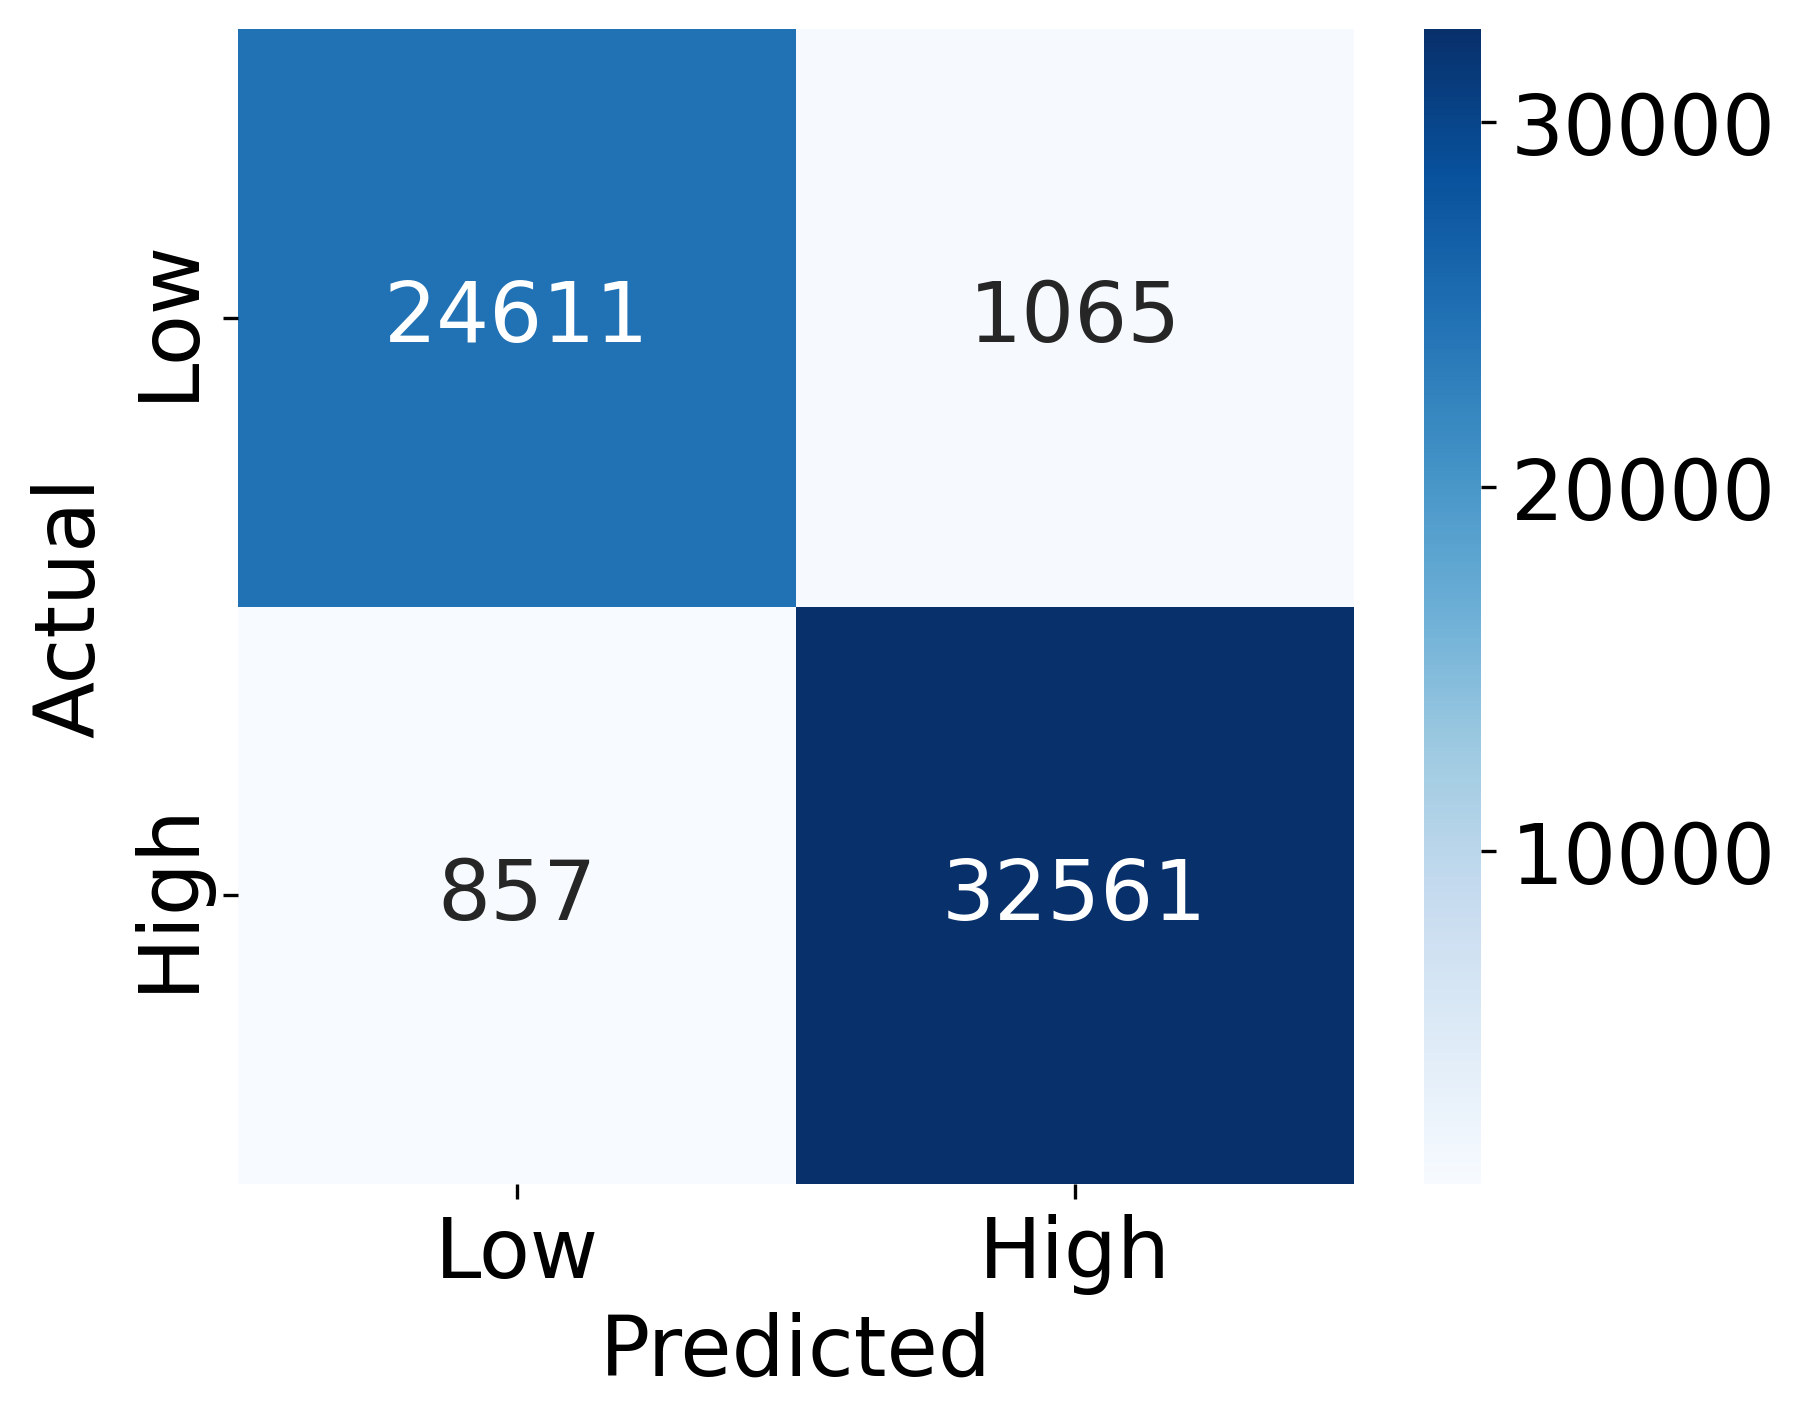

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming y_true and y_pred are already defined and possibly one-hot encoded
y_true = np.array(y_test)
y_pred = model_loaded.predict(x_test)

# If y_true or y_pred are one-hot encoded, flatten them
y_true = np.argmax(y_true, axis=1)  # Convert to label indices if one-hot encoded
y_pred = np.argmax(y_pred, axis=1)  # Convert to label indices if one-hot encoded

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix using Seaborn heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'High'], yticklabels=['Low', 'High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
# plt.title('Confusion Matrix')
plt.show()

1847/1847 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


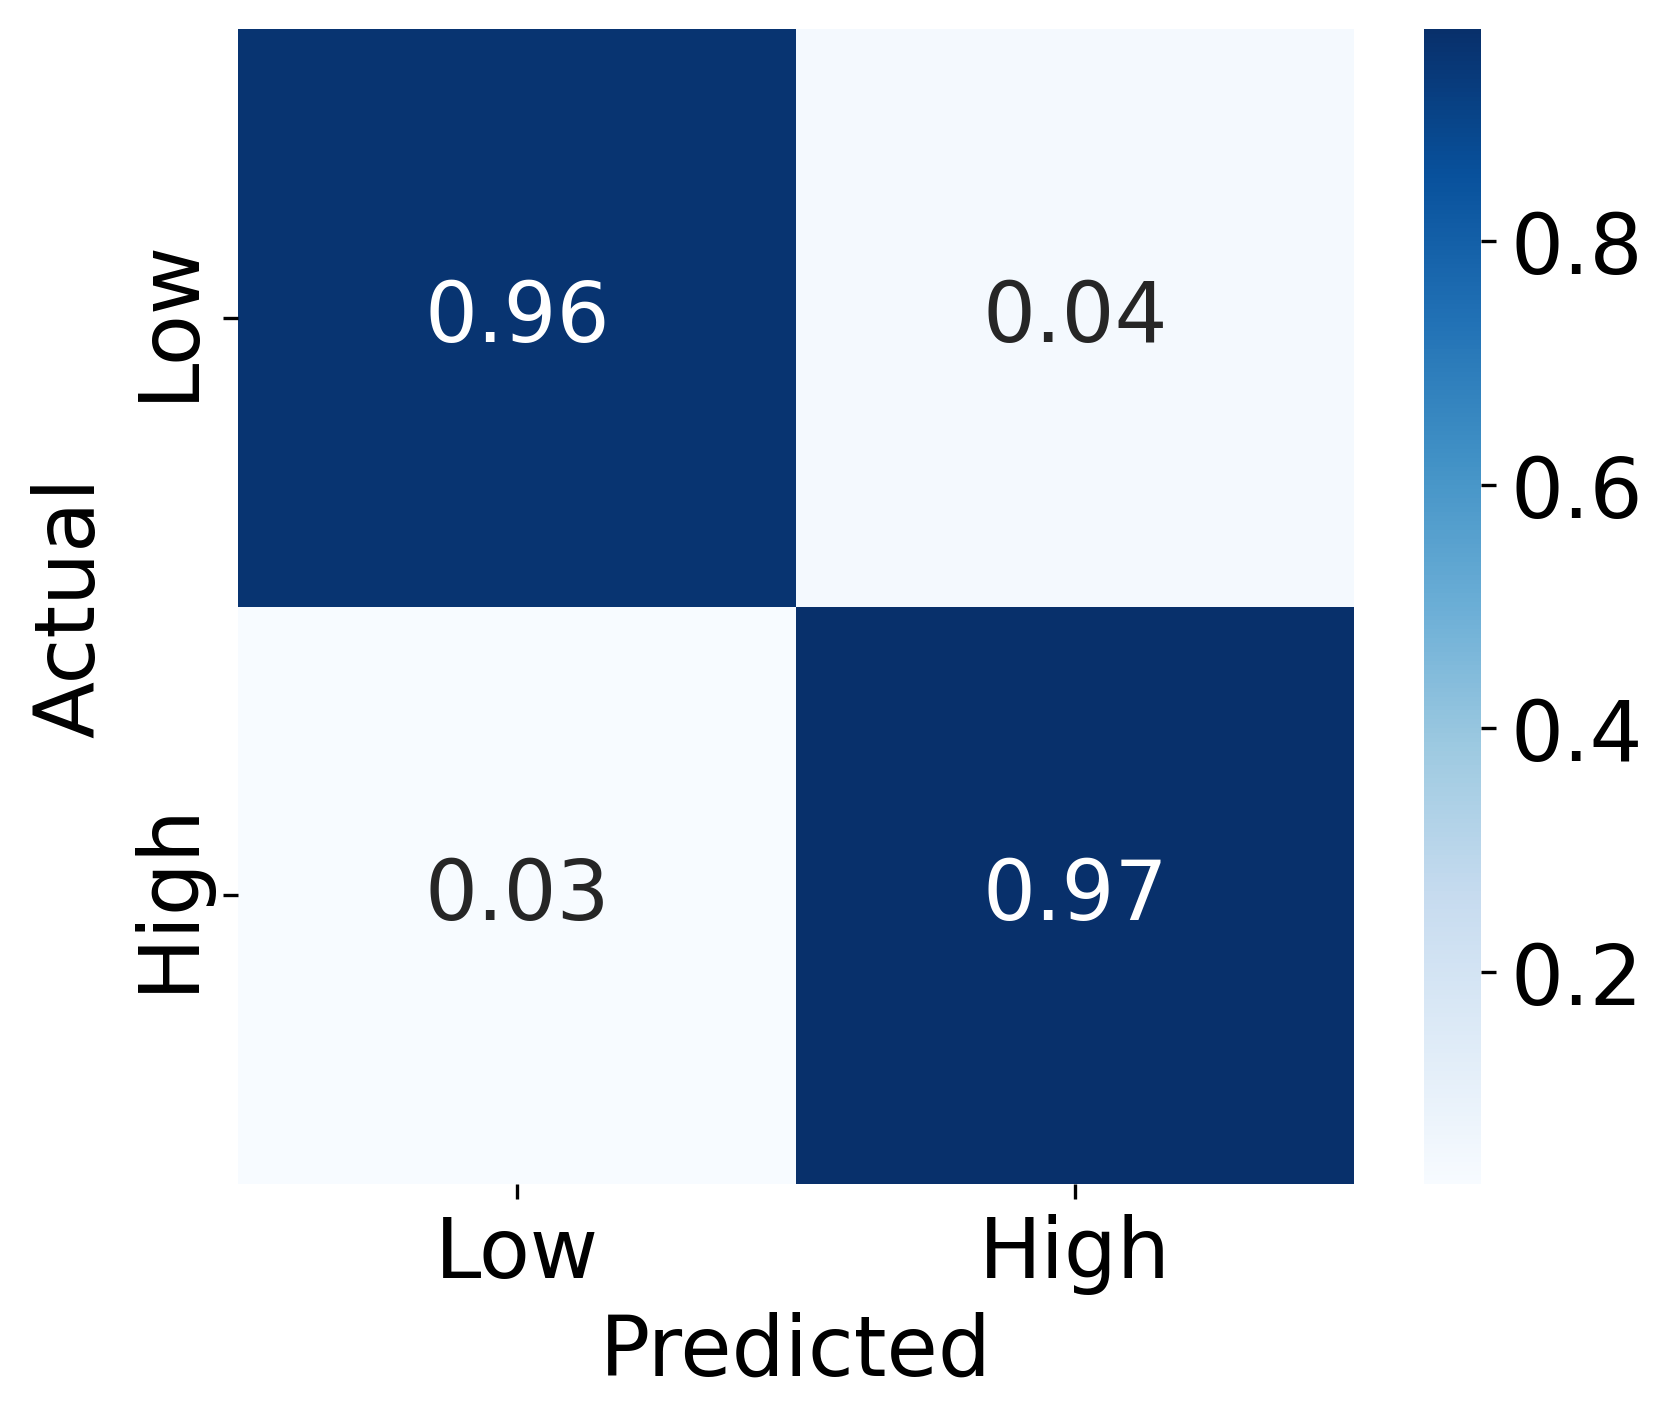

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming y_true and y_pred are already defined and possibly one-hot encoded
y_true = np.array(y_test)
y_pred = model_loaded.predict(x_test)

# If y_true or y_pred are one-hot encoded, flatten them
y_true = np.argmax(y_true, axis=1)  # Convert to label indices if one-hot encoded
y_pred = np.argmax(y_pred, axis=1)  # Convert to label indices if one-hot encoded

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Normalize the confusion matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plot normalized confusion matrix using Seaborn heatmap
plt.figure(figsize=(6, 5))
ax = sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues',
                 xticklabels=['Low', 'High'],
                 yticklabels=['Low', 'High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
#plt.title('Normalized Confusion Matrix')
plt.show()

1847/1847 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


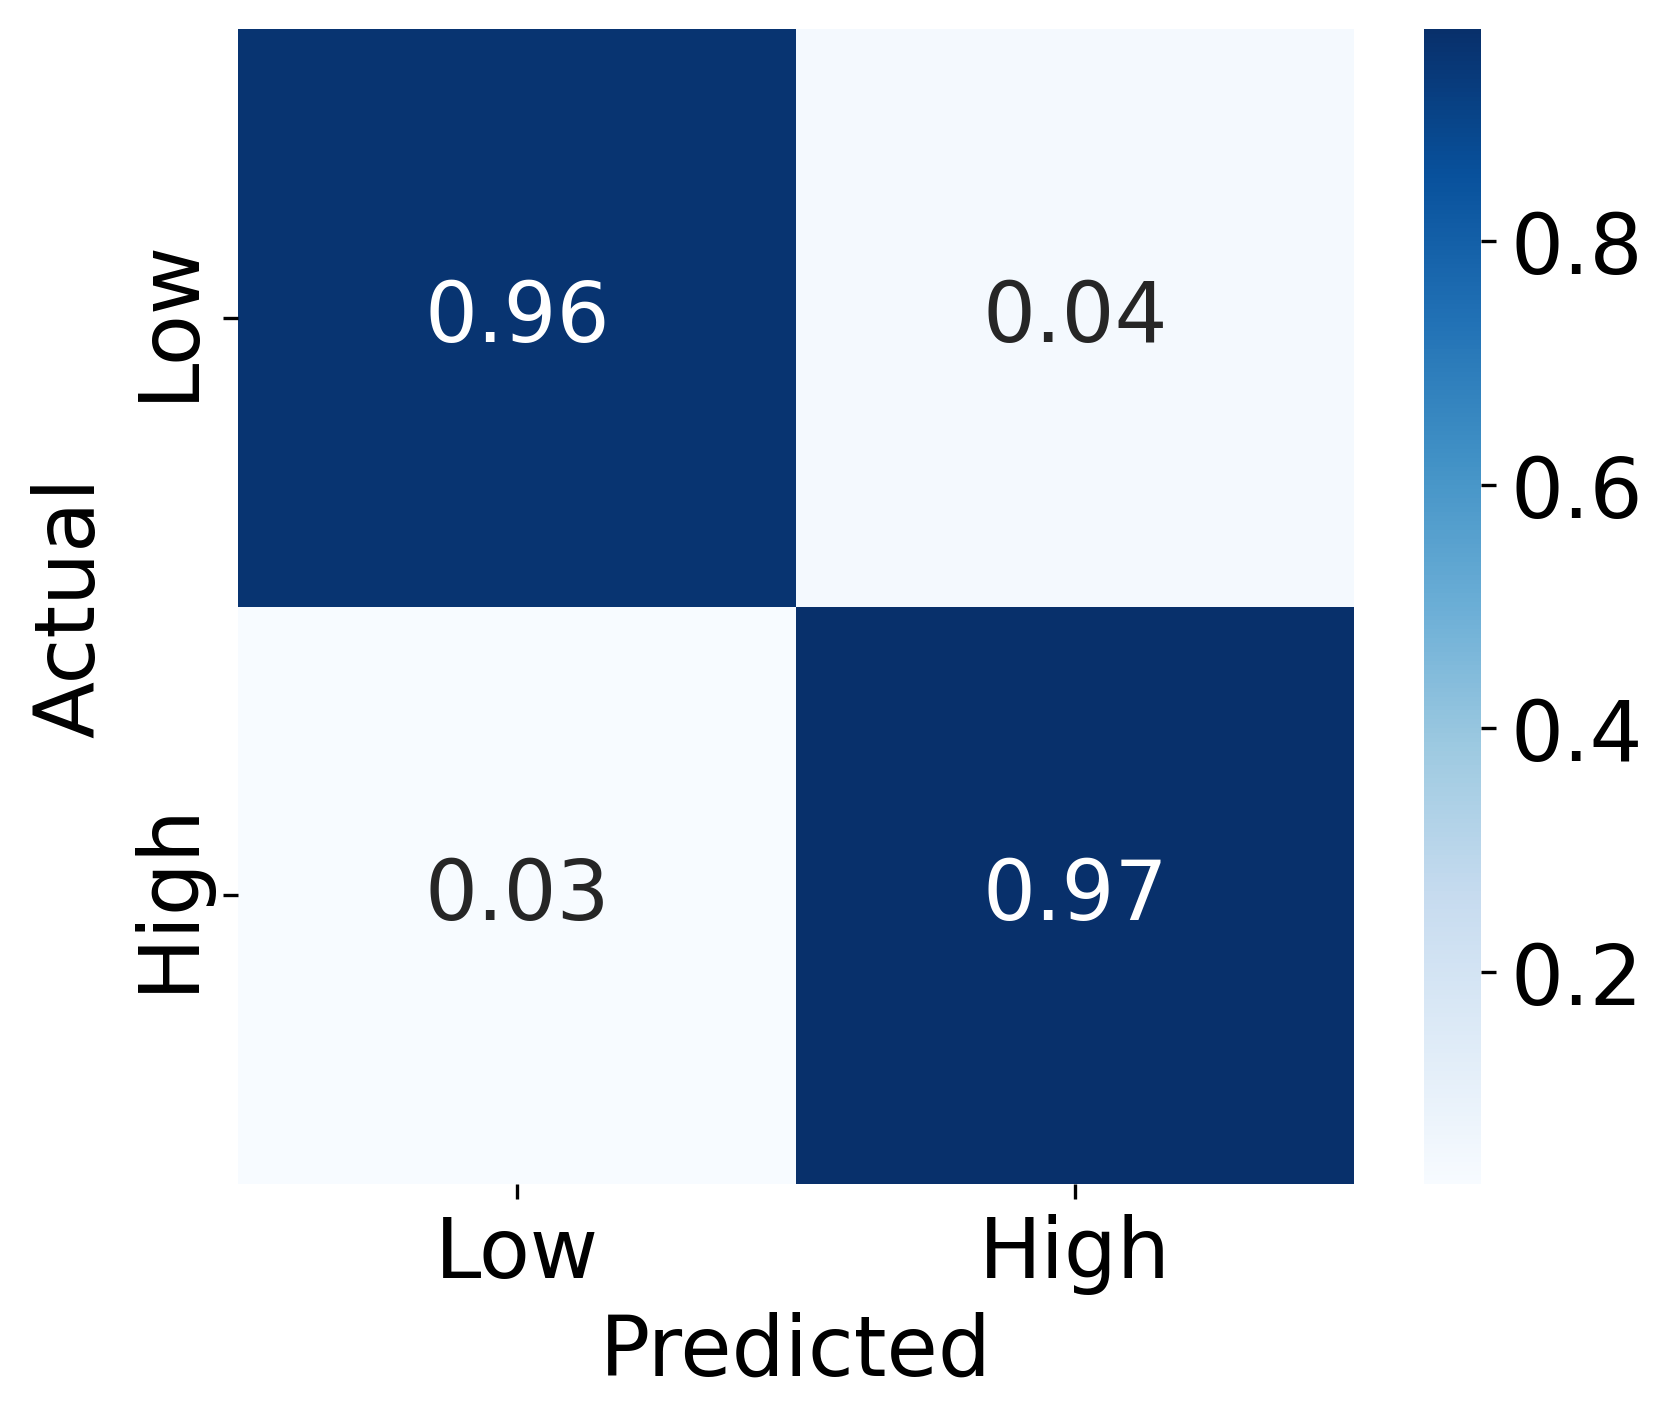

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming y_true and y_pred are already defined and possibly one-hot encoded
y_true = np.array(y_test)
y_pred = model_loaded.predict(x_test)

# If y_true or y_pred are one-hot encoded, flatten them
y_true = np.argmax(y_true, axis=1)  # Convert to label indices if one-hot encoded
y_pred = np.argmax(y_pred, axis=1)  # Convert to label indices if one-hot encoded

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Normalize the confusion matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plot normalized confusion matrix using Seaborn heatmap
plt.figure(figsize=(6, 5))
ax = sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues',
                 xticklabels=['Low', 'High'],
                 yticklabels=['Low', 'High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
#plt.title('Normalized Confusion Matrix')
plt.show()

# Arousal

In [ ]:
# Importing Dataset
train = pd.read_csv('/content/drive/Shareddrives/Best Shared Drive Ever/EEG/AMIGO data/Pre-processed/train_data.csv')
test = pd.read_csv('/content/drive/Shareddrives/Best Shared Drive Ever/EEG/AMIGO data/Pre-processed/test_data.csv')

In [ ]:
train = train.dropna()

In [ ]:
test = test.dropna()

In [ ]:
# Rename the column 'Dominance' to 'Dominancencoded_e'
train.rename(columns={'Domain': 'Dominance'}, inplace=True)
test.rename(columns={'Domain': 'Dominance'}, inplace=True)

<ipython-input-162-e6ef128ed694>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.rename(columns={'Domain': 'Dominance'}, inplace=True)
<ipython-input-162-e6ef128ed694>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.rename(columns={'Domain': 'Dominance'}, inplace=True)


In [ ]:
# Rename the column 'Liking' to 'Liking'
train.rename(columns={'Like': 'Liking'}, inplace=True)
test.rename(columns={'Like': 'Liking'}, inplace=True)

<ipython-input-163-4a264b00db60>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.rename(columns={'Like': 'Liking'}, inplace=True)
<ipython-input-163-4a264b00db60>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.rename(columns={'Like': 'Liking'}, inplace=True)


In [ ]:
# Copy the original dataset
encoded_train = train.copy()

# List of columns to modify
# columns_to_modify = ['Valence', 'Arousal', 'Dominance', 'Liking']
columns_to_modify = ['Arousal']

# Apply the transformation: 1-4.99 becomes 0, everything else becomes 1
encoded_train[columns_to_modify] = encoded_train[columns_to_modify].applymap(
    lambda x: 0 if 1 <= x <= 4.99 else 1
)

<ipython-input-164-2eab4b18cd24>:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  encoded_train[columns_to_modify] = encoded_train[columns_to_modify].applymap(


In [ ]:
# Replace 9 with 8.99 in specified columns
columns_to_update = ['Valence', 'Dominance', 'Liking']
encoded_train[columns_to_update] = encoded_train[columns_to_update].replace(9, 8.99)

In [ ]:
# Copy
encoded_test = test.copy()

# List of columns to modify
#columns_to_modify = ['Valence', 'Arousal', 'Dominance', 'Liking']
columns_to_modify = ['Arousal']

# Apply the transformation: 1-4.99 becomes 0, 5-9 becomes 1
encoded_test[columns_to_modify] = encoded_test[columns_to_modify].applymap(
    lambda x: 0 if 1 <= x <= 4.99 else 1
)

<ipython-input-166-87c013976b14>:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  encoded_test[columns_to_modify] = encoded_test[columns_to_modify].applymap(


In [ ]:
# Replace 9 with 8.99 in specified columns
columns_to_update = ['Valence', 'Dominance', 'Liking']
encoded_test[columns_to_update] = encoded_test[columns_to_update].replace(9, 8.99)

## Train-Test Split

### Arousal

In [ ]:
# Labeling
X_train = encoded_train[['C1B1', 'C1B2', 'C1B3', 'C1B4', 'C1B5', 'C2B5', 'C4B5', 'C5B1', 'C5B2', 'C5B3', 'C5B4', 'C5B5', 'C6B1', 'C6B2', 'C6B3', 'C6B4', 'C6B5', 'C9B4', 'C9B5', 'C11B2', 'C11B4', 'C11B5', 'C12B1', 'C12B2', 'C12B3', 'C12B4', 'C12B5', 'C13B1', 'C13B3', 'C15B1', 'C15B5', 'C16B5']]
Y_train = encoded_train['Arousal'] # Target label

x_test = encoded_test[['C1B1', 'C1B2', 'C1B3', 'C1B4', 'C1B5', 'C2B5', 'C4B5', 'C5B1', 'C5B2', 'C5B3', 'C5B4', 'C5B5', 'C6B1', 'C6B2', 'C6B3', 'C6B4', 'C6B5', 'C9B4', 'C9B5', 'C11B2', 'C11B4', 'C11B5', 'C12B1', 'C12B2', 'C12B3', 'C12B4', 'C12B5', 'C13B1', 'C13B3', 'C15B1', 'C15B5', 'C16B5']]
y_test = encoded_test['Arousal'] # Target label

In [ ]:
# Train Count
print(Y_train.value_counts())

Arousal
1    109074
0     68208
Name: count, dtype: int64


In [ ]:
# Train Count
print(y_test.value_counts())

Arousal
1    36358
0    22736
Name: count, dtype: int64


### Deep Learning Algorithms

Find me

In [ ]:
# Fit the train and test data with StandarScaler

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
x_test = scaler.fit_transform(x_test)

In [ ]:
from tensorflow.keras.utils import to_categorical

# Reshape the input data
X_train = np.expand_dims(X_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

# One-hot encode the labels
Y_train = to_categorical(Y_train, num_classes=2)
y_test = to_categorical(y_test, num_classes=2)

## Proposed

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 32, 1)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_36 (Conv1D)  │ (None, 32, 32)    │        224 │ input_layer_3[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32, 32)    │        128 │ conv1d_36[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_24       │ (None, 32, 32)    │          0 │ batch_normalizat… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_37 (Conv1D)  │ (None, 32, 32)    │      6,176 │ activation_24[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_38 (Conv1D)  │ (None, 32, 32)    │         64 │ input_layer_3[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32, 32)    │        128 │ conv1d_37[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_12 (Add)        │ (None, 32, 32)    │          0 │ conv1d_38[0][0],  │
│                     │                   │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_25       │ (None, 32, 32)    │          0 │ add_12[0][0]      │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_12    │ (None, 16, 32)    │          0 │ activation_25[0]… │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_39 (Conv1D)  │ (None, 16, 64)    │     12,352 │ max_pooling1d_12… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 16, 64)    │        256 │ conv1d_39[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_26       │ (None, 16, 64)    │          0 │ batch_normalizat… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_40 (Conv1D)  │ (None, 16, 64)    │     24,640 │ activation_26[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_41 (Conv1D)  │ (None, 16, 64)    │      2,112 │ max_pooling1d_12… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 16, 64)    │        256 │ conv1d_40[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_13 (Add)        │ (None, 16, 64)    │          0 │ conv1d_41[0][0],  │
│                     │                   │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_27       │ (None, 16, 64)    │          0 │ add_13[0][0]      │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_13    │ (None, 8, 64)     │          0 │ activation_27[0]

 Total params: 904,866 (3.45 MB)

 Trainable params: 902,946 (3.44 MB)

 Non-trainable params: 1,920 (7.50 KB)

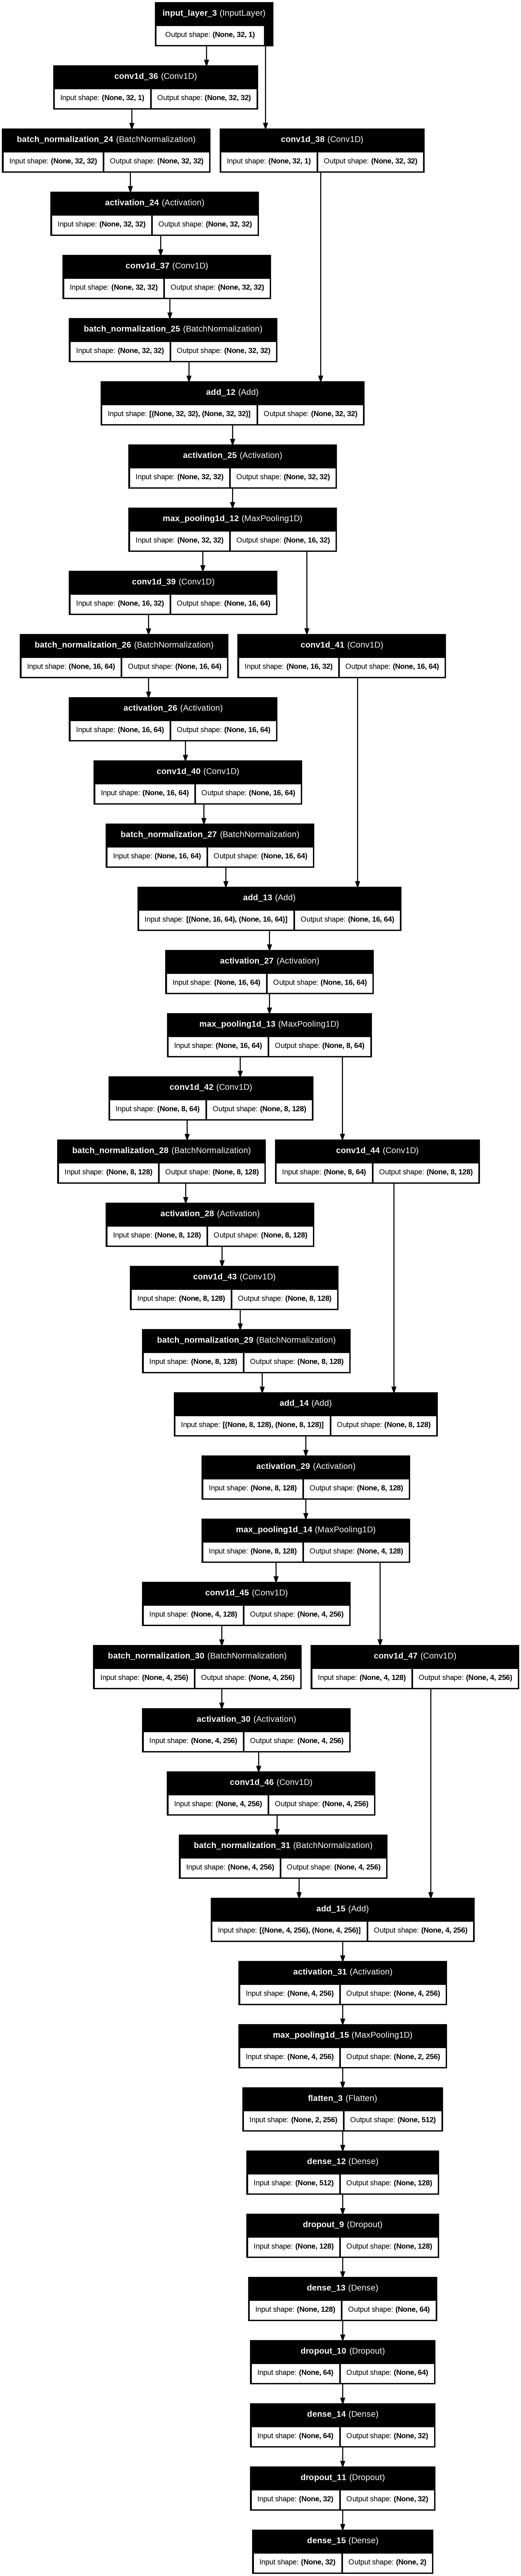

In [ ]:
from keras.layers import Input, Conv1D, BatchNormalization, MaxPooling1D, Flatten, Dense, Dropout, concatenate, Add, Activation
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import plot_model

# Input shape
input_shape = (X_train.shape[1], 1)

# Input layer
input_layer = Input(input_shape)

# Residual block function
def residual_block(x, filters, kernel_size, pool_size=2):
    shortcut = x
    conv = Conv1D(filters, kernel_size, padding='same', activation=None)(x)
    conv = BatchNormalization()(conv)
    conv = Activation('relu')(conv)
    conv = Conv1D(filters, kernel_size, padding='same', activation=None)(conv)
    conv = BatchNormalization()(conv)
    shortcut = Conv1D(filters, 1, padding='same', activation=None)(shortcut)  # Adjust dimensions
    x = Add()([shortcut, conv])
    x = Activation('relu')(x)
    x = MaxPooling1D(pool_size)(x)
    return x

# Build residual blocks
x = residual_block(input_layer, 32, 6)
x = residual_block(x, 64, 6)
x = residual_block(x, 128, 6)
x = residual_block(x, 256, 6)

# Global average pooling for better generalization
gap = Flatten()(x)

# Fully connected layers
dense1 = Dense(128, activation='relu')(gap)
drop1 = Dropout(0.25)(dense1)

dense2 = Dense(64, activation='relu')(drop1)
drop2 = Dropout(0.25)(dense2)

dense3 = Dense(32, activation='relu')(drop2)
drop3 = Dropout(0.25)(dense3)

# Output layer
output_layer = Dense(2, activation='softmax')(drop3)

# Build the model
model = Model(input_layer, output_layer)
model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model summary
model.summary()

# Plot the model architecture
plot_model(model, to_file='enhanced_model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
from tensorflow import keras

# Compile the model
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
# check points and early stopping
from keras.callbacks import ModelCheckpoint,EarlyStopping

model_name = "CNN"
filepath = "/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/EEG-Brain/AMIGO/Ideal/Model/Arousal/History/" + model_name + "weights-improvement-{epoch:02d}-{accuracy:.4f}.keras"
print(filepath)
checkpoint = ModelCheckpoint(filepath, monitor='accuracy', verbose=1, save_best_only=True, mode='max')
es = EarlyStopping(monitor='accuracy', mode='max', verbose=1, patience=10)
callbacks_list = [es, checkpoint]

/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/EEG-Brain/AMIGO/Ideal/Model/Arousal/History/CNNweights-improvement-{epoch:02d}-{accuracy:.4f}.keras


In [ ]:

# Train the model
H = model.fit(X_train, Y_train,
          batch_size=100,
          epochs=100,
          verbose=1,
          validation_data=(x_test, y_test),
          callbacks= callbacks_list)


Epoch 1/100
1773/1773 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7043 - loss: 0.5600
Epoch 1: accuracy improved from -inf to 0.75591, saving model to /content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/EEG-Brain/AMIGO/Ideal/Model/Arousal/History/CNNweights-improvement-01-0.7559.keras
1773/1773 ━━━━━━━━━━━━━━━━━━━━ 33s 11ms/step - accuracy: 0.7043 - loss: 0.5600 - val_accuracy: 0.8224 - val_loss: 0.3775
Epoch 2/100
1766/1773 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8338 - loss: 0.3598
Epoch 2: accuracy improved from 0.75591 to 0.84474, saving model to /content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/EEG-Brain/AMIGO/Ideal/Model/Arousal/History/CNNweights-improvement-02-0.8447.keras
1773/1773 ━━━━━━━━━━━━━━━━━━━━ 30s 8ms/step - accuracy: 0.8338 - loss: 0.3597 - val_accuracy: 0.8639 - val_loss: 0.3084
Epoch 3/100
1771/1773 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8789 - loss: 0.2807
Epoch 3: accuracy improved from 0.84474 to 0.88484, saving mo

In [ ]:

from keras.models import save_model

model.save("/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/EEG-Brain/AMIGO/Ideal/Model/Arousal/model.h5")


In [ ]:
from keras.models import load_model

model_loaded = load_model("/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/EEG-Brain/AMIGO/Ideal/Model/Arousal/model.h5")

In [ ]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=1)

# Print the test accuracy
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

1847/1847 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9686 - loss: 0.1564
Test Accuracy: 97.14%


In [ ]:
score = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

1847/1847 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9686 - loss: 0.1564
Test loss: 0.14468234777450562
Test accuracy: 0.9714184403419495


In [ ]:
from sklearn.metrics import accuracy_score

# Get model predictions
y_pred = model_loaded.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class predictions
y_true = np.argmax(y_test, axis=1)          # Convert one-hot encoded labels to class indices

# Compute accuracy for each class
class_accuracies = {}
for class_label in np.unique(y_true):
    indices = np.where(y_true == class_label)
    class_accuracy = accuracy_score(y_true[indices], y_pred_classes[indices])
    class_accuracies[class_label] = class_accuracy

# Print the test accuracies
for class_label, accuracy in class_accuracies.items():
    print(f'Test Accuracy for Class {class_label}: {accuracy * 100:.2f}%')

1847/1847 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step
Test Accuracy for Class 0: 96.01%
Test Accuracy for Class 1: 97.85%


In [ ]:

import pickle

# Specify the correct file path
history_file_path = '/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/EEG-Brain/AMIGO/Ideal/Model/Arousal/History/history.pkl'

# Save the model history to the file
with open(history_file_path, 'wb') as file_pi:
    pickle.dump(H, file_pi)


In [ ]:
import pickle

# Correct path with file name and extension
history_filepath = '/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/EEG-Brain/AMIGO/Ideal/Model/Arousal/History/history.pkl'

# Load the history from the file
with open(history_filepath, 'rb') as file:
    load_history = pickle.load(file)

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 50 variables whereas the saved optimizer has 98 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


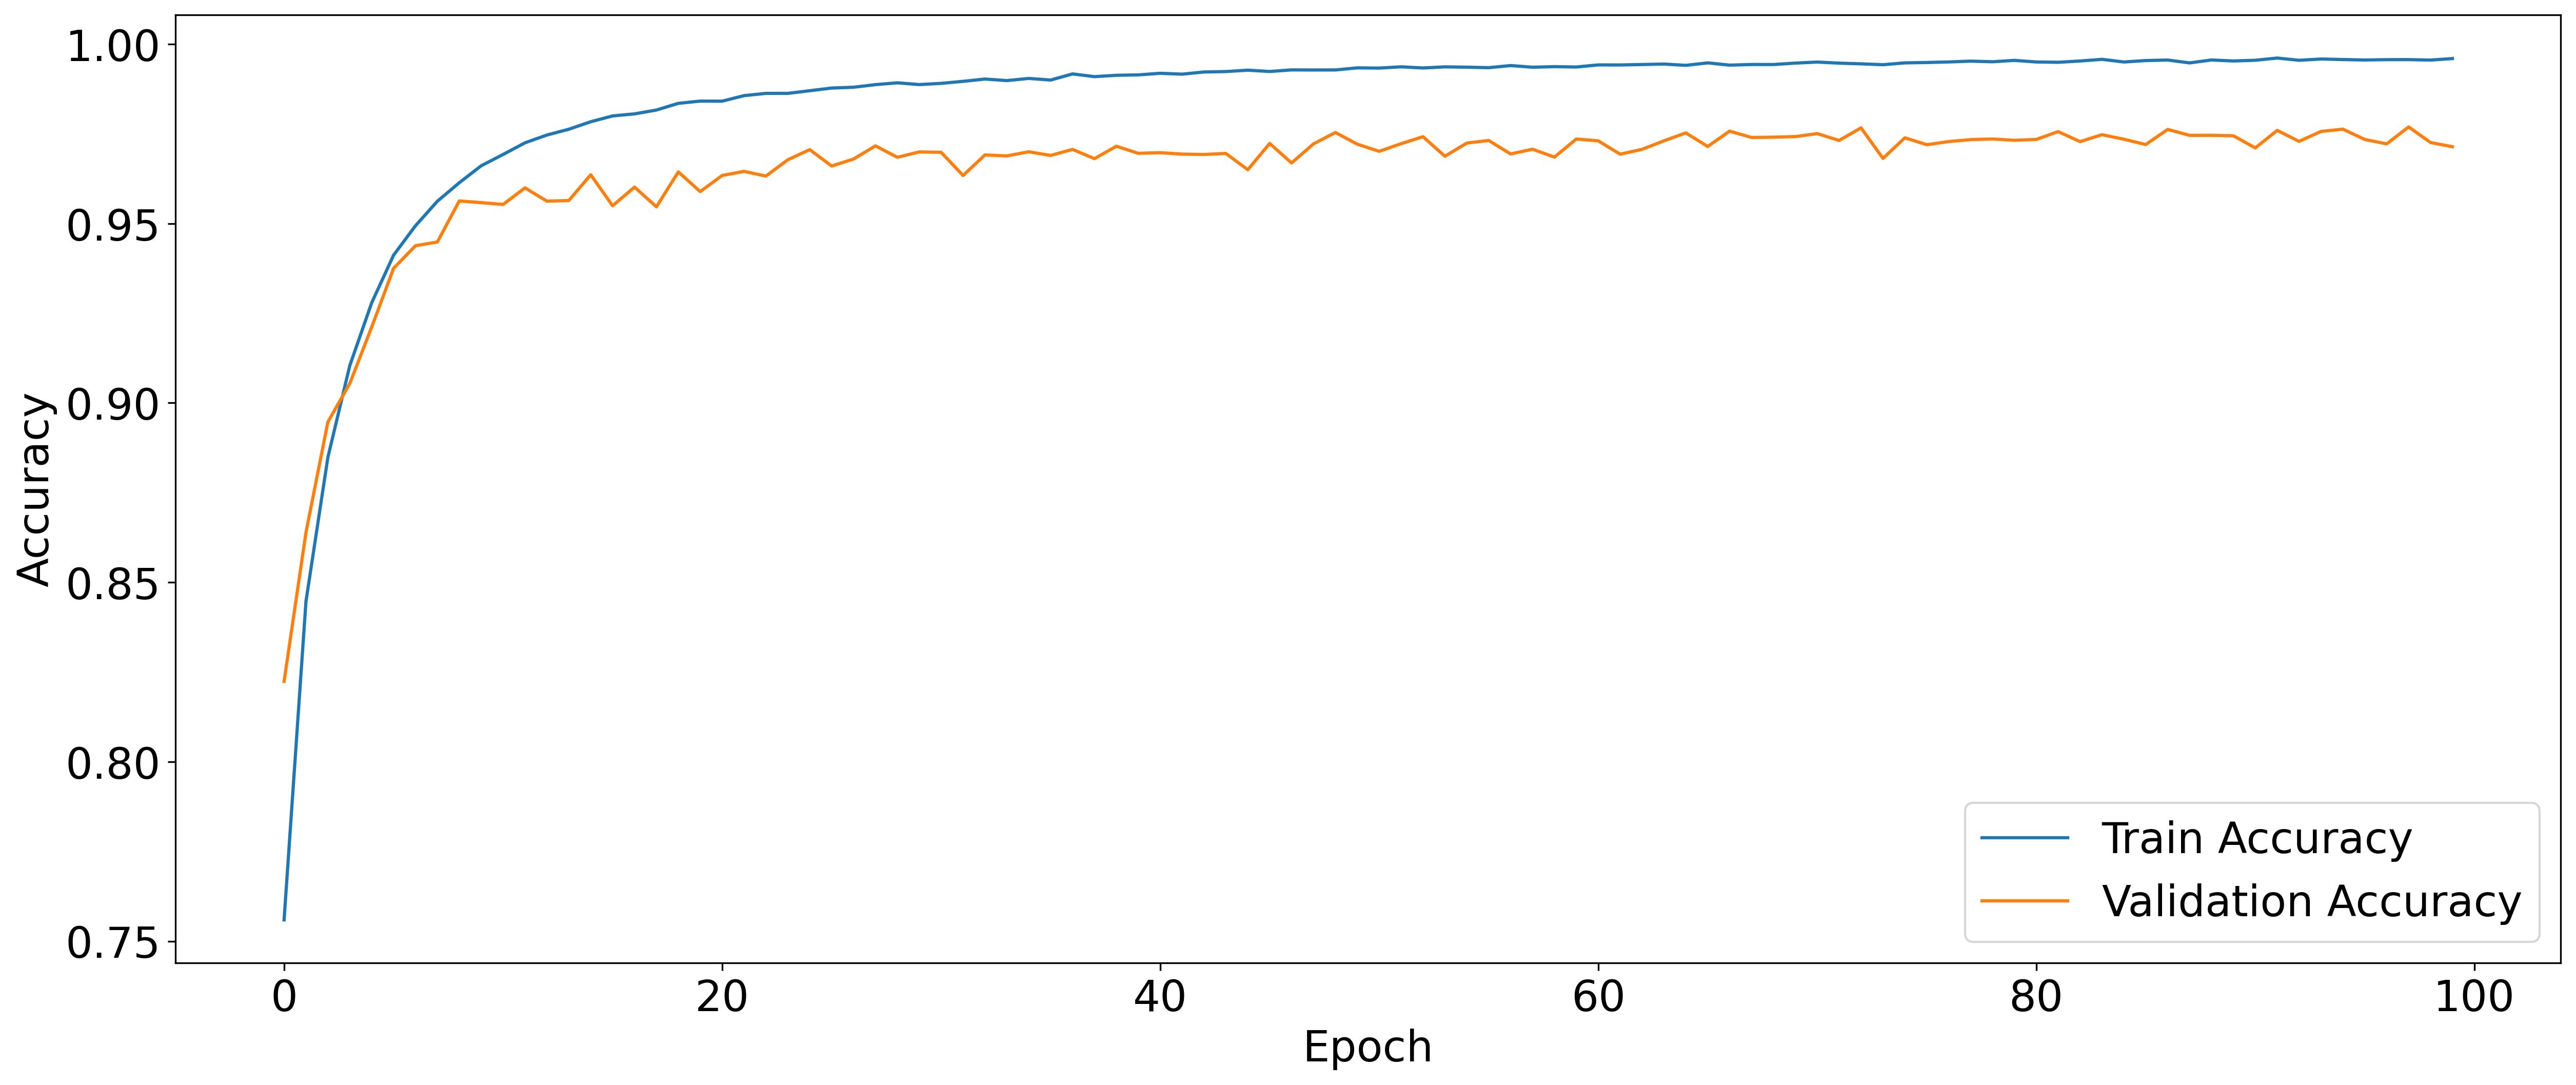

In [ ]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (20, 8)
plt.rcParams["font.size"] = 20

# Access accuracy and validation accuracy using the 'history' attribute
plt.plot(load_history.history['accuracy'], label='Train Accuracy')
plt.plot(load_history.history['val_accuracy'], label='Validation Accuracy')

#plt.title('CNN Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.show()

In [ ]:
from keras.models import load_model

model_loaded = load_model("/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/EEG-Brain/AMIGO/Ideal/Model/Arousal/model.h5")

In [ ]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Define the number of bootstrap iterations
n_bootstraps = 10
confidence_level = 0.95

# Function to calculate confidence intervals
def calculate_confidence_interval(data, confidence=0.95):
    lower_percentile = (1 - confidence) / 2 * 100
    upper_percentile = (1 + confidence) / 2 * 100
    lower_bound = np.percentile(data, lower_percentile)
    upper_bound = np.percentile(data, upper_percentile)
    return lower_bound, upper_bound

# Perform bootstrap
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

for _ in range(n_bootstraps):
    # Resample with replacement from the test set
    indices = np.random.choice(range(len(x_test)), size=len(x_test), replace=True)
    x_resampled = x_test[indices]
    y_resampled = y_test[indices]

    # Make predictions on the resampled data
    predictions = model_loaded.predict(x_resampled)
    y_pred = np.argmax(predictions, axis=1)  # Convert to class labels if needed

    # Ensure y_resampled is also in label format (convert if necessary)
    if y_resampled.ndim > 1 and y_resampled.shape[1] > 1:  # If one-hot encoded
        y_resampled = np.argmax(y_resampled, axis=1)

    # Calculate metrics
    accuracy_scores.append(accuracy_score(y_resampled, y_pred))
    precision_scores.append(precision_score(y_resampled, y_pred, average='weighted'))
    recall_scores.append(recall_score(y_resampled, y_pred, average='weighted'))
    f1_scores.append(f1_score(y_resampled, y_pred, average='weighted'))

# Calculate confidence intervals
accuracy_ci = calculate_confidence_interval(accuracy_scores, confidence=confidence_level)
precision_ci = calculate_confidence_interval(precision_scores, confidence=confidence_level)
recall_ci = calculate_confidence_interval(recall_scores, confidence=confidence_level)
f1_ci = calculate_confidence_interval(f1_scores, confidence=confidence_level)

# Print results
print(f"Confidence interval for accuracy: {accuracy_ci[0]:.4f} - {accuracy_ci[1]:.4f}")
print(f"Confidence interval for precision: {precision_ci[0]:.4f} - {precision_ci[1]:.4f}")
print(f"Confidence interval for recall: {recall_ci[0]:.4f} - {recall_ci[1]:.4f}")
print(f"Confidence interval for F1 score: {f1_ci[0]:.4f} - {f1_ci[1]:.4f}")

1847/1847 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step
1847/1847 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step
1847/1847 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step
1847/1847 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step
1847/1847 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step
1847/1847 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step
1847/1847 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step
1847/1847 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step
1847/1847 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step
1847/1847 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step
Confidence interval for accuracy: 0.9704 - 0.9724
Confidence interval for precision: 0.9704 - 0.9724
Confidence interval for recall: 0.9704 - 0.9724
Confidence interval for F1 score: 0.9704 - 0.9724


In [ ]:
from keras.models import load_model

score = model_loaded.evaluate(x_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

1847/1847 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9686 - loss: 0.1564
Test loss: 0.14468234777450562
Test accuracy: 0.9714184403419495


In [ ]:
y_true = np.array(y_test)
y_pred = model_loaded.predict(x_test)

1847/1847 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


In [ ]:
y_pred = np.squeeze(y_pred)
y_pred = np.array(y_pred >= 0.5, dtype=int)  # Use 'int' instead of 'np.int'

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96     22736
           1       0.98      0.98      0.98     36358

   micro avg       0.97      0.97      0.97     59094
   macro avg       0.97      0.97      0.97     59094
weighted avg       0.97      0.97      0.97     59094
 samples avg       0.97      0.97      0.97     59094



1847/1847 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


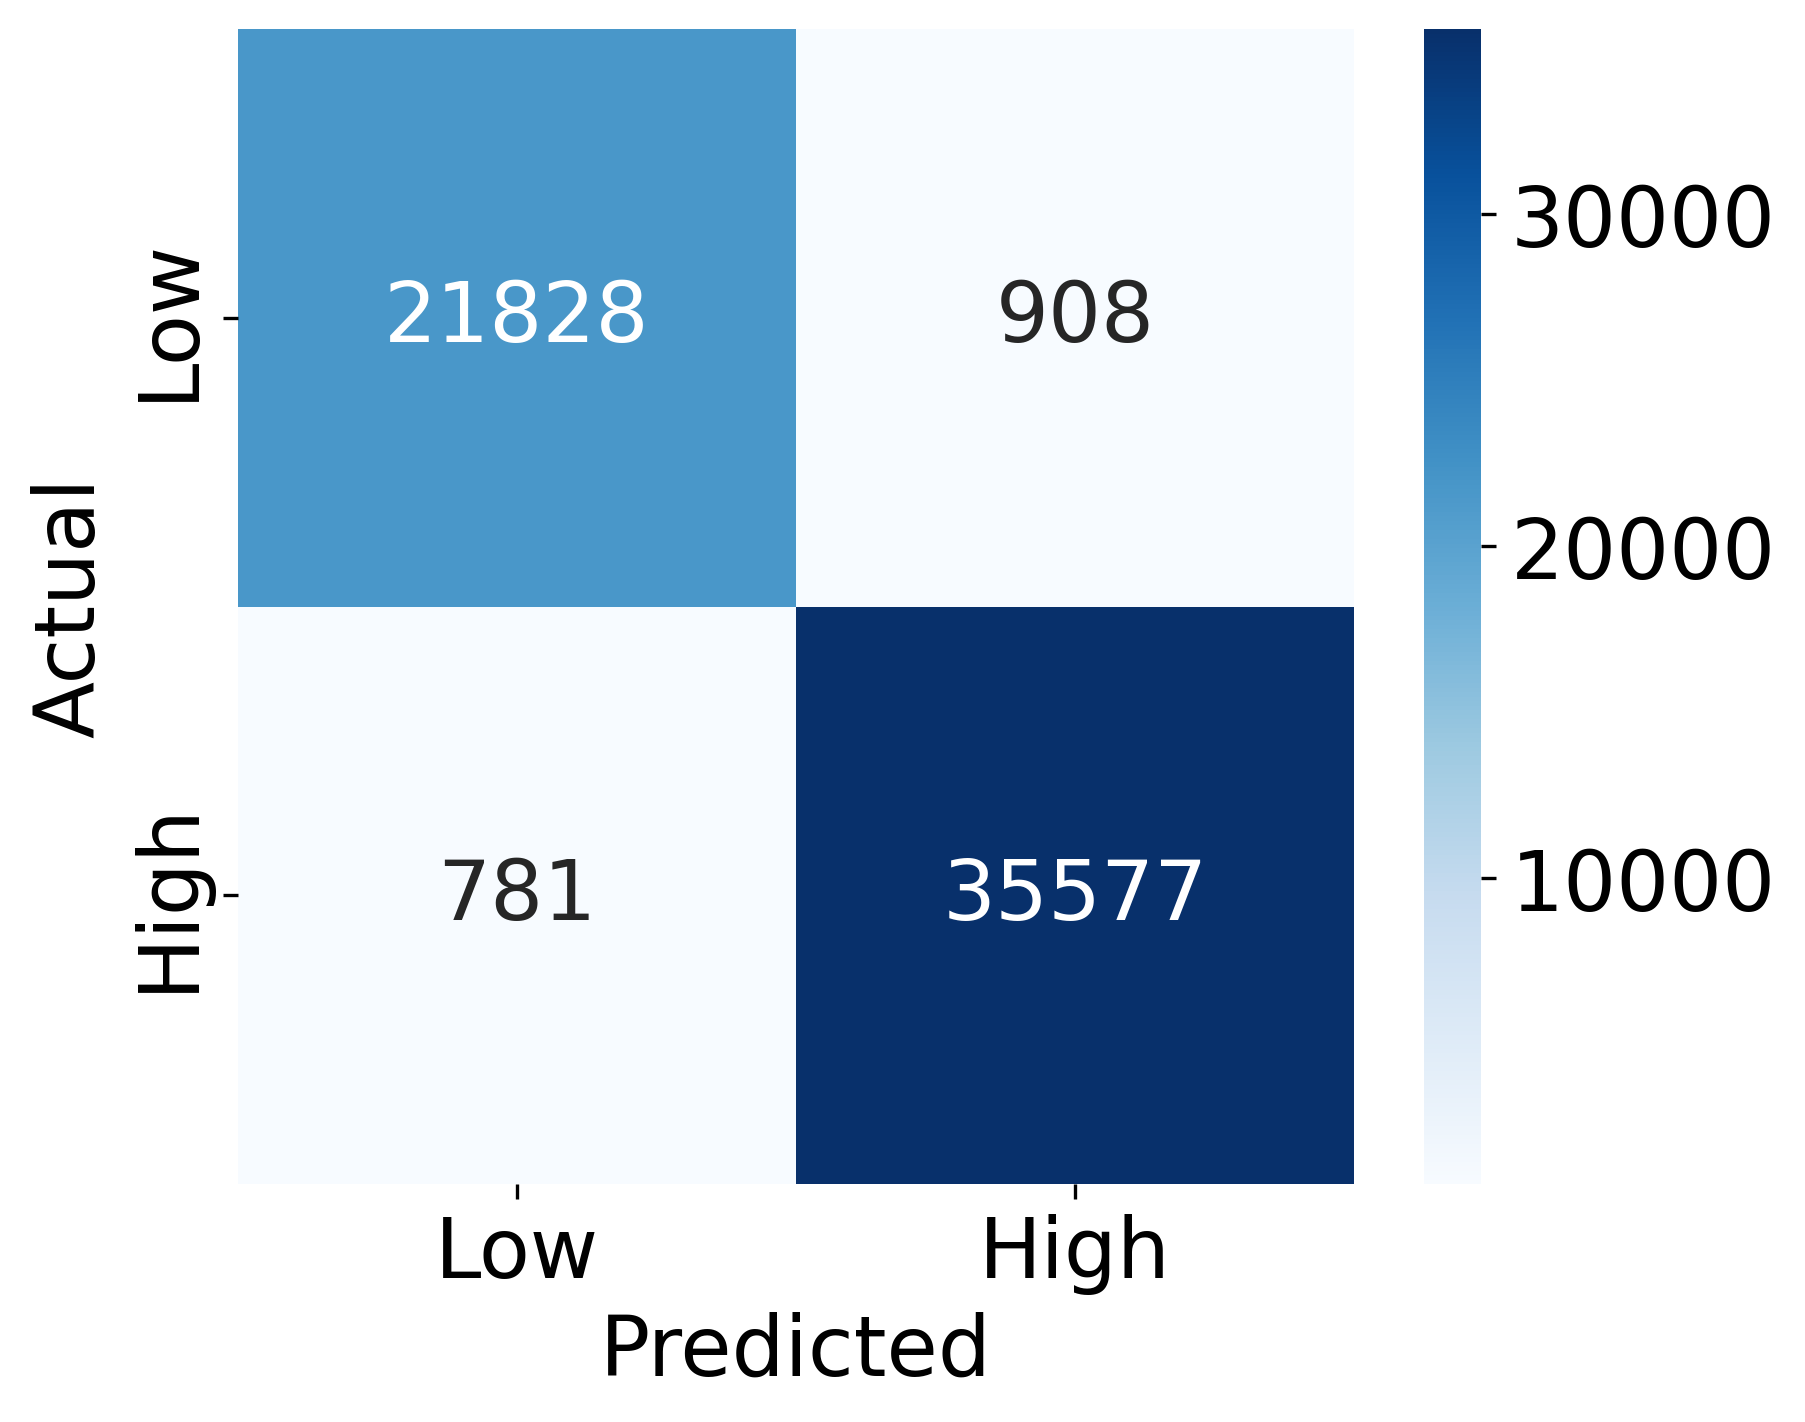

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming y_true and y_pred are already defined and possibly one-hot encoded
y_true = np.array(y_test)
y_pred = model_loaded.predict(x_test)

# If y_true or y_pred are one-hot encoded, flatten them
y_true = np.argmax(y_true, axis=1)  # Convert to label indices if one-hot encoded
y_pred = np.argmax(y_pred, axis=1)  # Convert to label indices if one-hot encoded

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix using Seaborn heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'High'], yticklabels=['Low', 'High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
# plt.title('Confusion Matrix')
plt.show()

1847/1847 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step


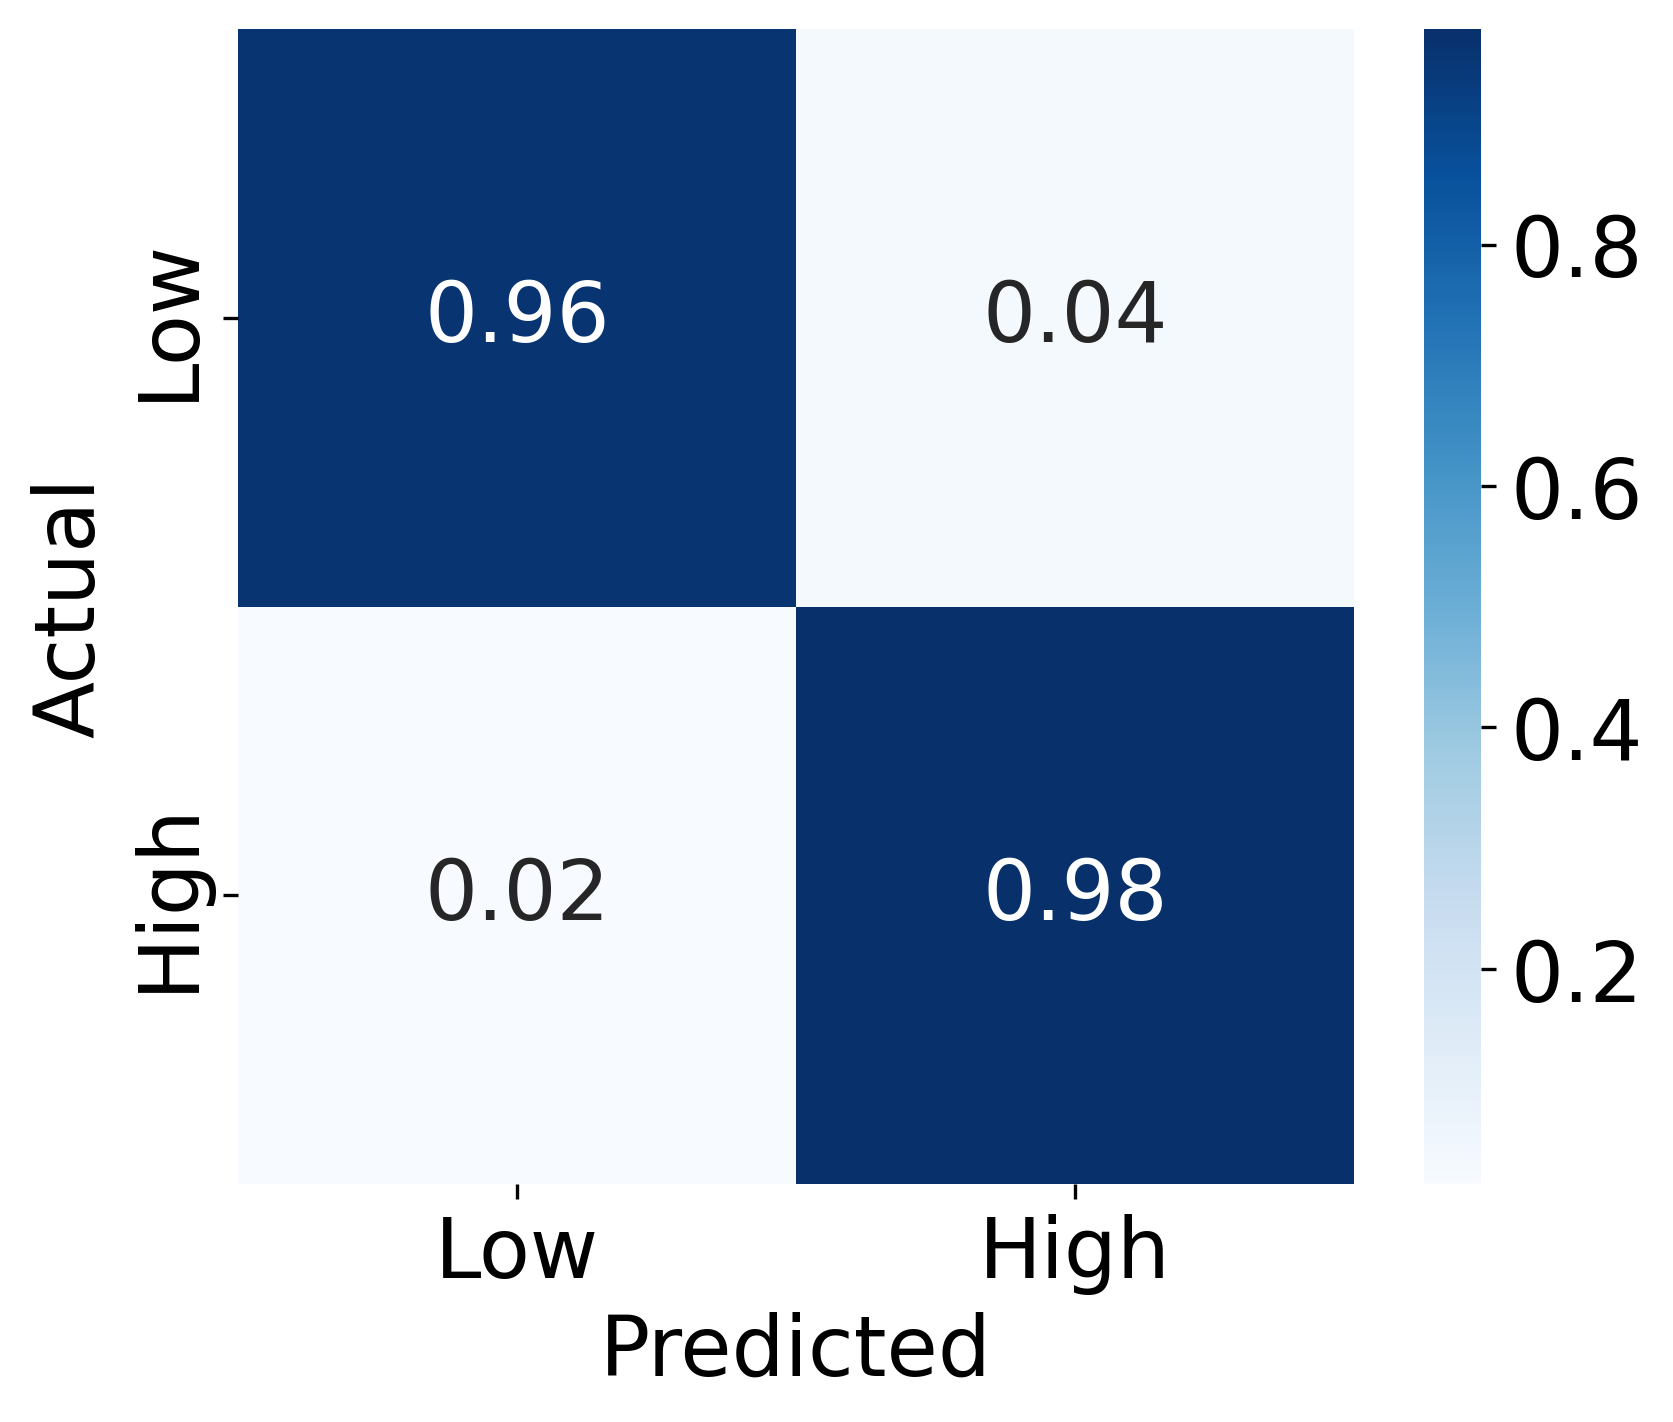

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming y_true and y_pred are already defined and possibly one-hot encoded
y_true = np.array(y_test)
y_pred = model_loaded.predict(x_test)

# If y_true or y_pred are one-hot encoded, flatten them
y_true = np.argmax(y_true, axis=1)  # Convert to label indices if one-hot encoded
y_pred = np.argmax(y_pred, axis=1)  # Convert to label indices if one-hot encoded

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Normalize the confusion matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plot normalized confusion matrix using Seaborn heatmap
plt.figure(figsize=(6, 5))
ax = sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues',
                 xticklabels=['Low', 'High'],
                 yticklabels=['Low', 'High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
#plt.title('Normalized Confusion Matrix')
plt.show()

# Dominance

In [ ]:
# Importing Dataset
train = pd.read_csv('/content/drive/Shareddrives/Best Shared Drive Ever/EEG/AMIGO data/Pre-processed/train_data.csv')
test = pd.read_csv('/content/drive/Shareddrives/Best Shared Drive Ever/EEG/AMIGO data/Pre-processed/test_data.csv')

In [ ]:
train = train.dropna()

In [ ]:
test = test.dropna()

In [ ]:
# Rename the column 'Dominance' to 'Dominancencoded_e'
train.rename(columns={'Domain': 'Dominance'}, inplace=True)
test.rename(columns={'Domain': 'Dominance'}, inplace=True)

In [ ]:
# Rename the column 'Liking' to 'Liking'
train.rename(columns={'Like': 'Liking'}, inplace=True)
test.rename(columns={'Like': 'Liking'}, inplace=True)

In [ ]:
# Copy the original dataset
encoded_train = train.copy()

# List of columns to modify
# columns_to_modify = ['Valence', 'Arousal', 'Dominance', 'Liking']
columns_to_modify = ['Dominance']

# Apply the transformation: 1-4.99 becomes 0, everything else becomes 1
encoded_train[columns_to_modify] = encoded_train[columns_to_modify].applymap(
    lambda x: 0 if 1 <= x <= 4.99 else 1
)

<ipython-input-230-f6a5e8d3b0a5>:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  encoded_train[columns_to_modify] = encoded_train[columns_to_modify].applymap(


In [ ]:
# Replace 9 with 8.99 in specified columns
columns_to_update = ['Valence', 'Arousal', 'Liking']
encoded_train[columns_to_update] = encoded_train[columns_to_update].replace(9, 8.99)

In [ ]:
# Copy
encoded_test = test.copy()

# List of columns to modify
#columns_to_modify = ['Valence', 'Arousal', 'Dominance', 'Liking']
columns_to_modify = ['Dominance']

# Apply the transformation: 1-4.99 becomes 0, 5-9 becomes 1
encoded_test[columns_to_modify] = encoded_test[columns_to_modify].applymap(
    lambda x: 0 if 1 <= x <= 4.99 else 1
)

<ipython-input-232-5a0bdd7ff4b1>:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  encoded_test[columns_to_modify] = encoded_test[columns_to_modify].applymap(


In [ ]:
# Replace 9 with 8.99 in specified columns
columns_to_update = ['Valence', 'Arousal', 'Liking']
encoded_test[columns_to_update] = encoded_test[columns_to_update].replace(9, 8.99)

## Train-Test Split

### Dominance

In [ ]:
# Labeling
X_train = encoded_train[['C1B1', 'C1B2', 'C1B3', 'C1B4', 'C1B5', 'C2B5', 'C4B5', 'C5B1', 'C5B2', 'C5B3', 'C5B4', 'C5B5', 'C6B1', 'C6B2', 'C6B3', 'C6B4', 'C6B5', 'C9B4', 'C9B5', 'C11B2', 'C11B4', 'C11B5', 'C12B1', 'C12B2', 'C12B3', 'C12B4', 'C12B5', 'C13B1', 'C13B3', 'C15B1', 'C15B5', 'C16B5']]
Y_train = encoded_train['Dominance'] # Target label

x_test = encoded_test[['C1B1', 'C1B2', 'C1B3', 'C1B4', 'C1B5', 'C2B5', 'C4B5', 'C5B1', 'C5B2', 'C5B3', 'C5B4', 'C5B5', 'C6B1', 'C6B2', 'C6B3', 'C6B4', 'C6B5', 'C9B4', 'C9B5', 'C11B2', 'C11B4', 'C11B5', 'C12B1', 'C12B2', 'C12B3', 'C12B4', 'C12B5', 'C13B1', 'C13B3', 'C15B1', 'C15B5', 'C16B5']]
y_test = encoded_test['Dominance'] # Target label

In [ ]:
# Train Count
print(Y_train.value_counts())

Dominance
0    88788
1    88494
Name: count, dtype: int64


In [ ]:
# Train Count
print(y_test.value_counts())

Dominance
0    29596
1    29498
Name: count, dtype: int64


### Deep Learning Algorithms

In [ ]:
# Fit the train and test data with StandarScaler

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
x_test = scaler.fit_transform(x_test)

In [ ]:
from tensorflow.keras.utils import to_categorical

# Reshape the input data
X_train = np.expand_dims(X_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

# One-hot encode the labels
Y_train = to_categorical(Y_train, num_classes=2)
y_test = to_categorical(y_test, num_classes=2)

## Proposed

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5       │ (None, 32, 1)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_60 (Conv1D)  │ (None, 32, 32)    │        224 │ input_layer_5[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32, 32)    │        128 │ conv1d_60[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_40       │ (None, 32, 32)    │          0 │ batch_normalizat… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_61 (Conv1D)  │ (None, 32, 32)    │      6,176 │ activation_40[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_62 (Conv1D)  │ (None, 32, 32)    │         64 │ input_layer_5[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32, 32)    │        128 │ conv1d_61[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_20 (Add)        │ (None, 32, 32)    │          0 │ conv1d_62[0][0],  │
│                     │                   │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_41       │ (None, 32, 32)    │          0 │ add_20[0][0]      │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_20    │ (None, 16, 32)    │          0 │ activation_41[0]… │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_63 (Conv1D)  │ (None, 16, 64)    │     12,352 │ max_pooling1d_20… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 16, 64)    │        256 │ conv1d_63[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_42       │ (None, 16, 64)    │          0 │ batch_normalizat… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_64 (Conv1D)  │ (None, 16, 64)    │     24,640 │ activation_42[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_65 (Conv1D)  │ (None, 16, 64)    │      2,112 │ max_pooling1d_20… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 16, 64)    │        256 │ conv1d_64[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_21 (Add)        │ (None, 16, 64)    │          0 │ conv1d_65[0][0],  │
│                     │                   │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_43       │ (None, 16, 64)    │          0 │ add_21[0][0]      │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_21    │ (None, 8, 64)     │          0 │ activation_43[0]

 Total params: 904,866 (3.45 MB)

 Trainable params: 902,946 (3.44 MB)

 Non-trainable params: 1,920 (7.50 KB)

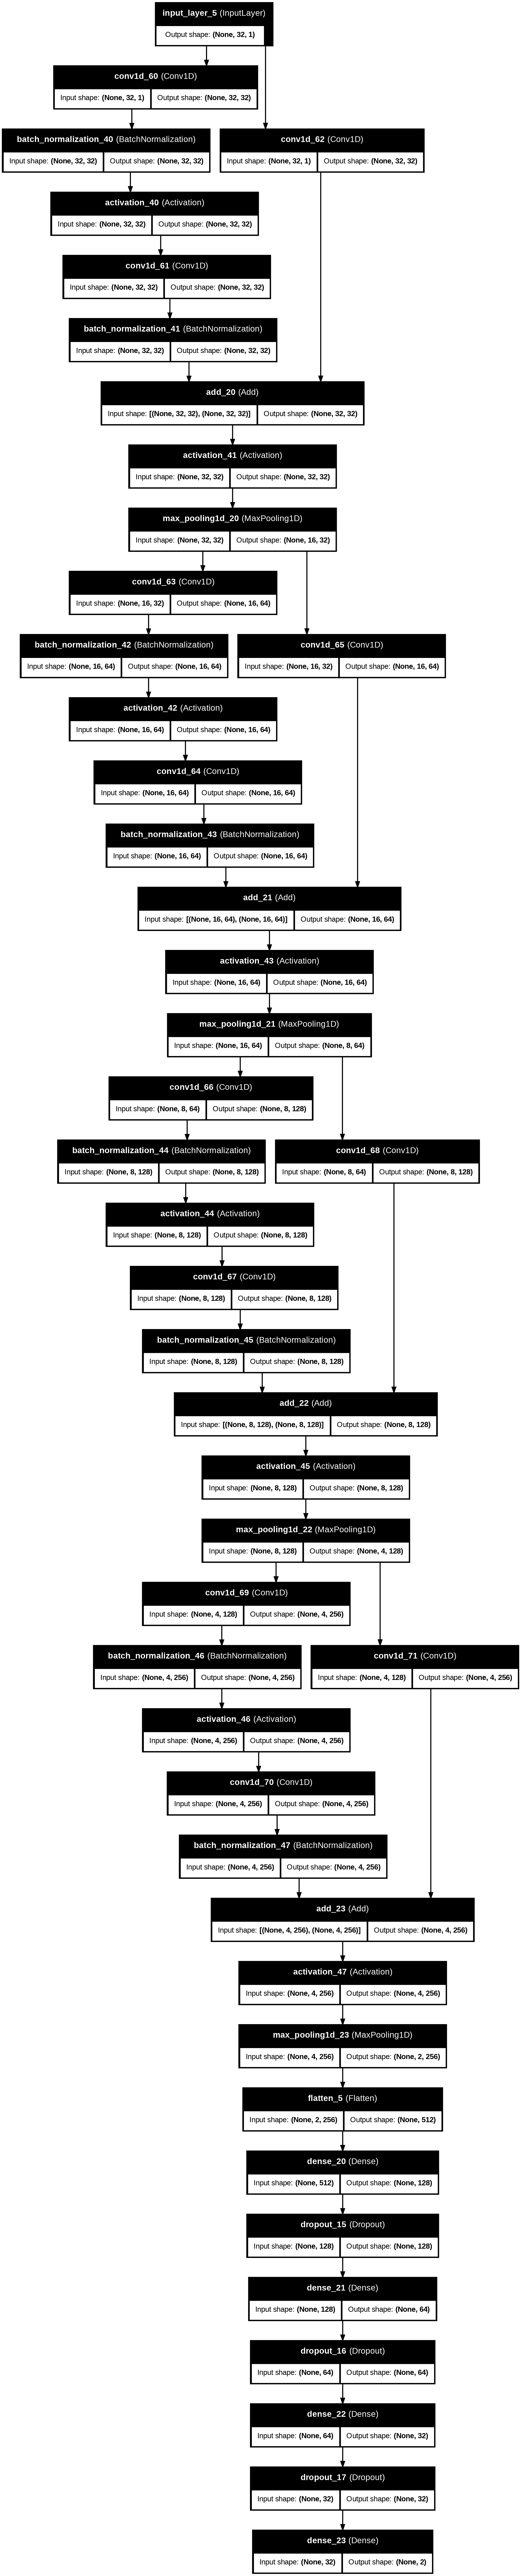

In [ ]:
from keras.layers import Input, Conv1D, BatchNormalization, MaxPooling1D, Flatten, Dense, Dropout, concatenate, Add, Activation
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import plot_model

# Input shape
input_shape = (X_train.shape[1], 1)

# Input layer
input_layer = Input(input_shape)

# Residual block function
def residual_block(x, filters, kernel_size, pool_size=2):
    shortcut = x
    conv = Conv1D(filters, kernel_size, padding='same', activation=None)(x)
    conv = BatchNormalization()(conv)
    conv = Activation('relu')(conv)
    conv = Conv1D(filters, kernel_size, padding='same', activation=None)(conv)
    conv = BatchNormalization()(conv)
    shortcut = Conv1D(filters, 1, padding='same', activation=None)(shortcut)  # Adjust dimensions
    x = Add()([shortcut, conv])
    x = Activation('relu')(x)
    x = MaxPooling1D(pool_size)(x)
    return x

# Build residual blocks
x = residual_block(input_layer, 32, 6)
x = residual_block(x, 64, 6)
x = residual_block(x, 128, 6)
x = residual_block(x, 256, 6)

# Global average pooling for better generalization
gap = Flatten()(x)

# Fully connected layers
dense1 = Dense(128, activation='relu')(gap)
drop1 = Dropout(0.25)(dense1)

dense2 = Dense(64, activation='relu')(drop1)
drop2 = Dropout(0.25)(dense2)

dense3 = Dense(32, activation='relu')(drop2)
drop3 = Dropout(0.25)(dense3)

# Output layer
output_layer = Dense(2, activation='softmax')(drop3)

# Build the model
model = Model(input_layer, output_layer)
model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model summary
model.summary()

# Plot the model architecture
plot_model(model, to_file='enhanced_model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
from tensorflow import keras

# Compile the model
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
# check points and early stopping
from keras.callbacks import ModelCheckpoint,EarlyStopping

model_name = "CNN"
filepath = "/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/EEG-Brain/AMIGO/Ideal/Model/Dominance/History/" + model_name + "weights-improvement-{epoch:02d}-{accuracy:.4f}.keras"
print(filepath)
checkpoint = ModelCheckpoint(filepath, monitor='accuracy', verbose=1, save_best_only=True, mode='max')
es = EarlyStopping(monitor='accuracy', mode='max', verbose=1, patience=10)
callbacks_list = [es, checkpoint]

/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/EEG-Brain/AMIGO/Ideal/Model/Dominance/History/CNNweights-improvement-{epoch:02d}-{accuracy:.4f}.keras


In [ ]:

# Train the model
H = model.fit(X_train, Y_train,
          batch_size=100,
          epochs=100,
          verbose=1,
          validation_data=(x_test, y_test),
          callbacks= callbacks_list)


Epoch 1/100
1773/1773 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6221 - loss: 0.6361
Epoch 1: accuracy improved from -inf to 0.69885, saving model to /content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/EEG-Brain/AMIGO/Ideal/Model/Dominance/History/CNNweights-improvement-01-0.6989.keras
1773/1773 ━━━━━━━━━━━━━━━━━━━━ 34s 12ms/step - accuracy: 0.6222 - loss: 0.6360 - val_accuracy: 0.7946 - val_loss: 0.4214
Epoch 2/100
1767/1773 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8010 - loss: 0.4189
Epoch 2: accuracy improved from 0.69885 to 0.81306, saving model to /content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/EEG-Brain/AMIGO/Ideal/Model/Dominance/History/CNNweights-improvement-02-0.8131.keras
1773/1773 ━━━━━━━━━━━━━━━━━━━━ 28s 8ms/step - accuracy: 0.8010 - loss: 0.4189 - val_accuracy: 0.8378 - val_loss: 0.3512
Epoch 3/100
1773/1773 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8523 - loss: 0.3282
Epoch 3: accuracy improved from 0.81306 to 0.85883, savin

In [ ]:

from keras.models import save_model

model.save("/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/EEG-Brain/AMIGO/Ideal/Model/Dominance/model.h5")


In [ ]:
from keras.models import load_model

model_loaded = load_model("/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/EEG-Brain/AMIGO/Ideal/Model/Dominance/model.h5")

In [ ]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=1)

# Print the test accuracy
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

1847/1847 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9651 - loss: 0.1545
Test Accuracy: 96.37%


In [ ]:
score = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

1847/1847 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9651 - loss: 0.1545
Test loss: 0.15152926743030548
Test accuracy: 0.9637019038200378


In [ ]:
from sklearn.metrics import accuracy_score

# Get model predictions
y_pred = model_loaded.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class predictions
y_true = np.argmax(y_test, axis=1)          # Convert one-hot encoded labels to class indices

# Compute accuracy for each class
class_accuracies = {}
for class_label in np.unique(y_true):
    indices = np.where(y_true == class_label)
    class_accuracy = accuracy_score(y_true[indices], y_pred_classes[indices])
    class_accuracies[class_label] = class_accuracy

# Print the test accuracies
for class_label, accuracy in class_accuracies.items():
    print(f'Test Accuracy for Class {class_label}: {accuracy * 100:.2f}%')

1847/1847 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step
Test Accuracy for Class 0: 97.85%
Test Accuracy for Class 1: 94.88%


In [ ]:

import pickle

# Specify the correct file path
history_file_path = '/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/EEG-Brain/AMIGO/Ideal/Model/Dominance/History/history.pkl'

# Save the model history to the file
with open(history_file_path, 'wb') as file_pi:
    pickle.dump(H, file_pi)


In [ ]:
import pickle

# Correct path with file name and extension
history_filepath = '/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/EEG-Brain/AMIGO/Ideal/Model/Dominance/History/history.pkl'

# Load the history from the file
with open(history_filepath, 'rb') as file:
    load_history = pickle.load(file)

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 50 variables whereas the saved optimizer has 98 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


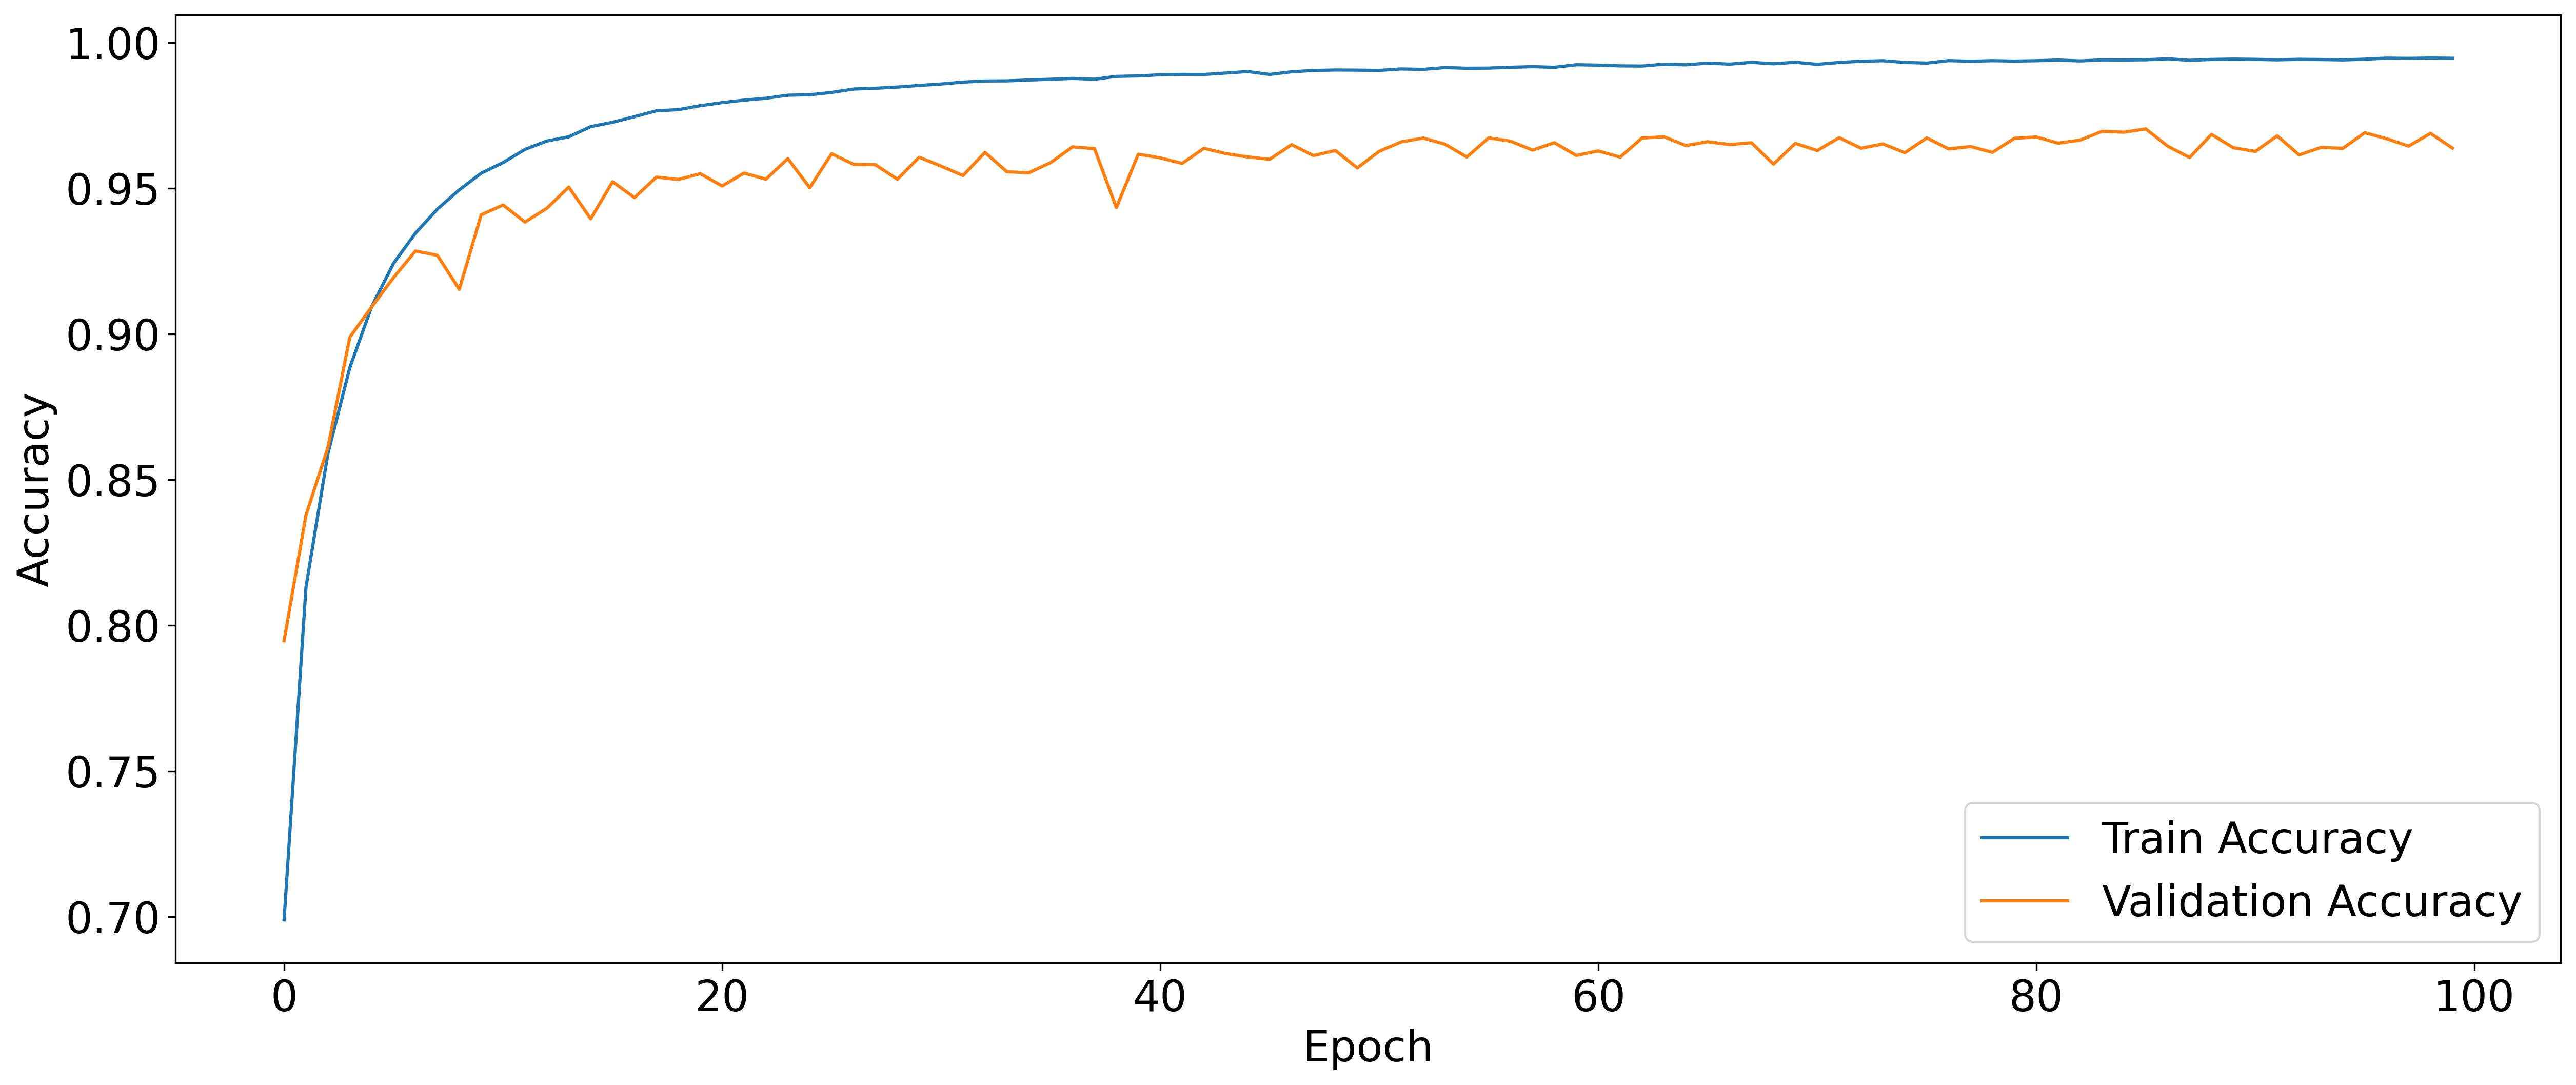

In [ ]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (20, 8)
plt.rcParams["font.size"] = 20

# Access accuracy and validation accuracy using the 'history' attribute
plt.plot(load_history.history['accuracy'], label='Train Accuracy')
plt.plot(load_history.history['val_accuracy'], label='Validation Accuracy')

#plt.title('CNN Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.show()

In [ ]:
from keras.models import load_model

model_loaded = load_model("/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/EEG-Brain/AMIGO/Ideal/Model/Dominance/model.h5")

In [ ]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Define the number of bootstrap iterations
n_bootstraps = 10
confidence_level = 0.95

# Function to calculate confidence intervals
def calculate_confidence_interval(data, confidence=0.95):
    lower_percentile = (1 - confidence) / 2 * 100
    upper_percentile = (1 + confidence) / 2 * 100
    lower_bound = np.percentile(data, lower_percentile)
    upper_bound = np.percentile(data, upper_percentile)
    return lower_bound, upper_bound

# Perform bootstrap
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

for _ in range(n_bootstraps):
    # Resample with replacement from the test set
    indices = np.random.choice(range(len(x_test)), size=len(x_test), replace=True)
    x_resampled = x_test[indices]
    y_resampled = y_test[indices]

    # Make predictions on the resampled data
    predictions = model_loaded.predict(x_resampled)
    y_pred = np.argmax(predictions, axis=1)  # Convert to class labels if needed

    # Ensure y_resampled is also in label format (convert if necessary)
    if y_resampled.ndim > 1 and y_resampled.shape[1] > 1:  # If one-hot encoded
        y_resampled = np.argmax(y_resampled, axis=1)

    # Calculate metrics
    accuracy_scores.append(accuracy_score(y_resampled, y_pred))
    precision_scores.append(precision_score(y_resampled, y_pred, average='weighted'))
    recall_scores.append(recall_score(y_resampled, y_pred, average='weighted'))
    f1_scores.append(f1_score(y_resampled, y_pred, average='weighted'))

# Calculate confidence intervals
accuracy_ci = calculate_confidence_interval(accuracy_scores, confidence=confidence_level)
precision_ci = calculate_confidence_interval(precision_scores, confidence=confidence_level)
recall_ci = calculate_confidence_interval(recall_scores, confidence=confidence_level)
f1_ci = calculate_confidence_interval(f1_scores, confidence=confidence_level)

# Print results
print(f"Confidence interval for accuracy: {accuracy_ci[0]:.4f} - {accuracy_ci[1]:.4f}")
print(f"Confidence interval for precision: {precision_ci[0]:.4f} - {precision_ci[1]:.4f}")
print(f"Confidence interval for recall: {recall_ci[0]:.4f} - {recall_ci[1]:.4f}")
print(f"Confidence interval for F1 score: {f1_ci[0]:.4f} - {f1_ci[1]:.4f}")

1847/1847 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step
1847/1847 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step
1847/1847 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step
1847/1847 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step
1847/1847 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step
1847/1847 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step
1847/1847 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step
1847/1847 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step
1847/1847 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step
1847/1847 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step
Confidence interval for accuracy: 0.9629 - 0.9647
Confidence interval for precision: 0.9634 - 0.9650
Confidence interval for recall: 0.9629 - 0.9647
Confidence interval for F1 score: 0.9629 - 0.9646


In [ ]:
from keras.models import load_model

score = model_loaded.evaluate(x_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

1847/1847 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9651 - loss: 0.1545
Test loss: 0.15152926743030548
Test accuracy: 0.9637019038200378


In [ ]:
y_true = np.array(y_test)
y_pred = model_loaded.predict(x_test)

1847/1847 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step


In [ ]:
y_pred = np.squeeze(y_pred)
y_pred = np.array(y_pred >= 0.5, dtype=int)  # Use 'int' instead of 'np.int'

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96     29596
           1       0.98      0.95      0.96     29498

   micro avg       0.96      0.96      0.96     59094
   macro avg       0.96      0.96      0.96     59094
weighted avg       0.96      0.96      0.96     59094
 samples avg       0.96      0.96      0.96     59094



1847/1847 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


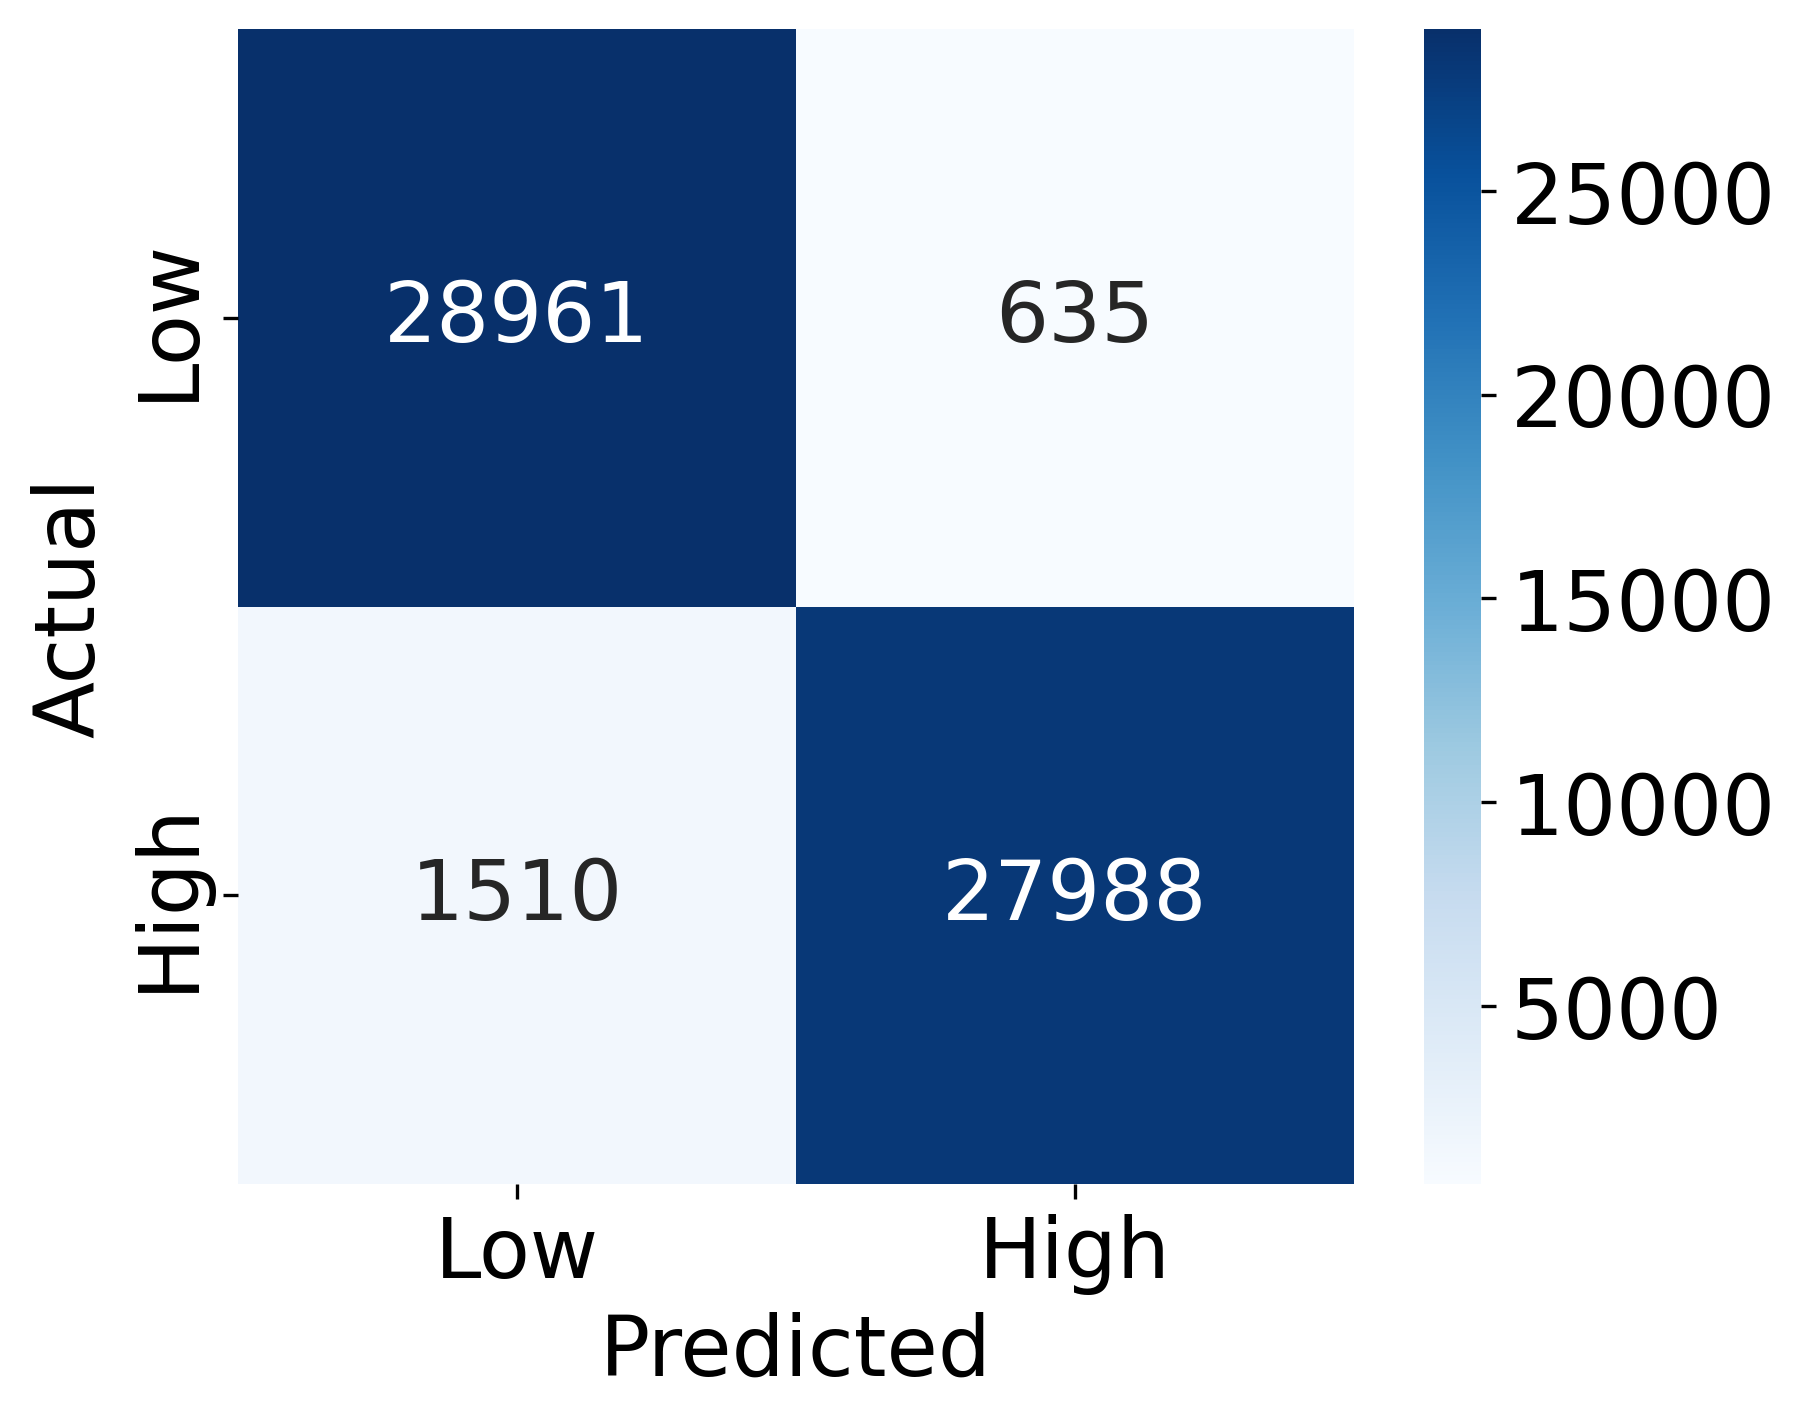

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming y_true and y_pred are already defined and possibly one-hot encoded
y_true = np.array(y_test)
y_pred = model_loaded.predict(x_test)

# If y_true or y_pred are one-hot encoded, flatten them
y_true = np.argmax(y_true, axis=1)  # Convert to label indices if one-hot encoded
y_pred = np.argmax(y_pred, axis=1)  # Convert to label indices if one-hot encoded

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix using Seaborn heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'High'], yticklabels=['Low', 'High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
# plt.title('Confusion Matrix')
plt.show()

1847/1847 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step


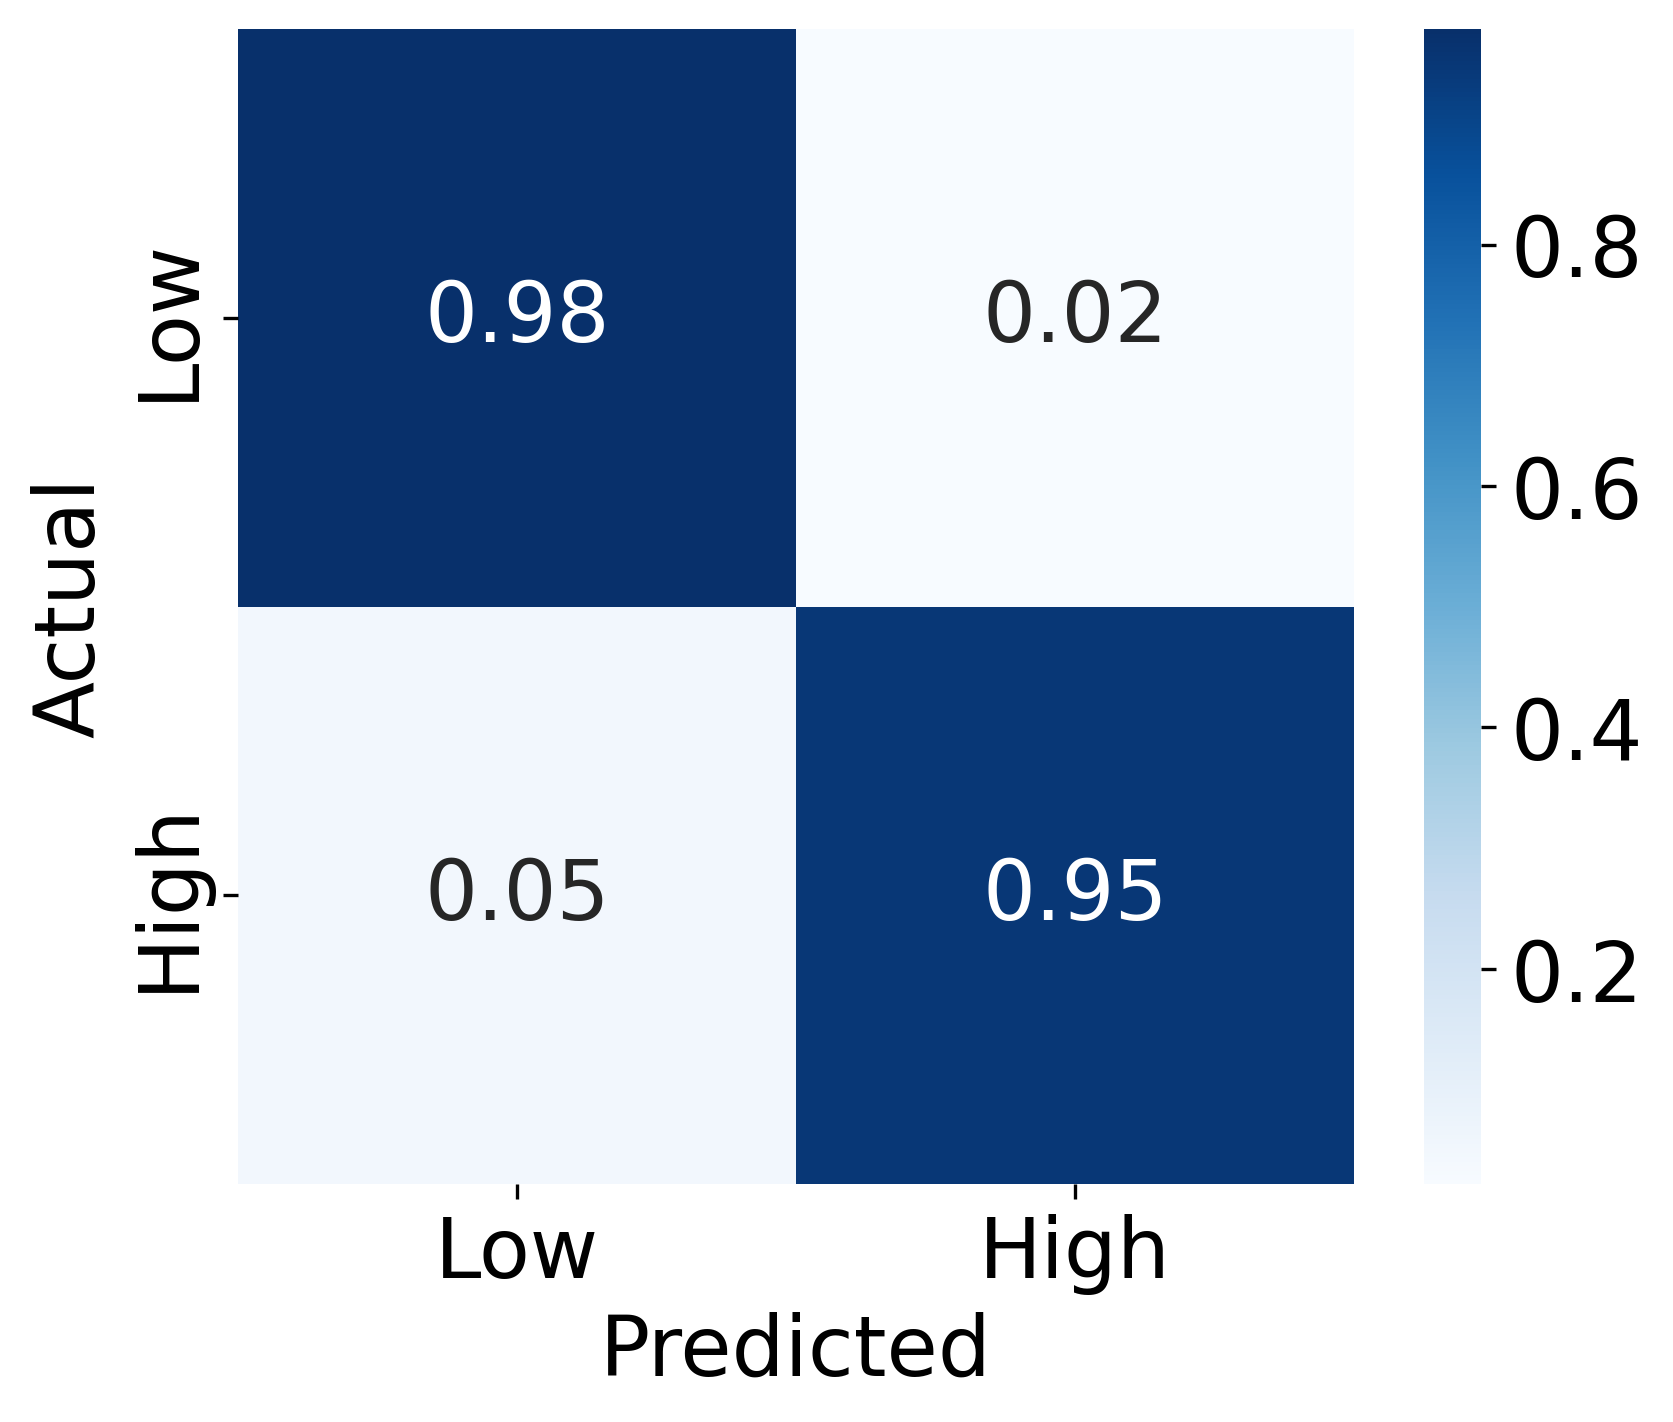

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming y_true and y_pred are already defined and possibly one-hot encoded
y_true = np.array(y_test)
y_pred = model_loaded.predict(x_test)

# If y_true or y_pred are one-hot encoded, flatten them
y_true = np.argmax(y_true, axis=1)  # Convert to label indices if one-hot encoded
y_pred = np.argmax(y_pred, axis=1)  # Convert to label indices if one-hot encoded

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Normalize the confusion matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plot normalized confusion matrix using Seaborn heatmap
plt.figure(figsize=(6, 5))
ax = sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues',
                 xticklabels=['Low', 'High'],
                 yticklabels=['Low', 'High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
#plt.title('Normalized Confusion Matrix')
plt.show()

# Liking

In [ ]:
# Importing Dataset
train = pd.read_csv('/content/drive/Shareddrives/Best Shared Drive Ever/EEG/AMIGO data/Pre-processed/train_data.csv')
test = pd.read_csv('/content/drive/Shareddrives/Best Shared Drive Ever/EEG/AMIGO data/Pre-processed/test_data.csv')

In [ ]:
train = train.dropna()

In [ ]:
test = test.dropna()

In [ ]:
# Rename the column 'Dominance' to 'Dominancencoded_e'
train.rename(columns={'Domain': 'Dominance'}, inplace=True)
test.rename(columns={'Domain': 'Dominance'}, inplace=True)

<ipython-input-261-e6ef128ed694>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.rename(columns={'Domain': 'Dominance'}, inplace=True)
<ipython-input-261-e6ef128ed694>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.rename(columns={'Domain': 'Dominance'}, inplace=True)


In [ ]:
# Rename the column 'Liking' to 'Liking'
train.rename(columns={'Like': 'Liking'}, inplace=True)
test.rename(columns={'Like': 'Liking'}, inplace=True)

<ipython-input-262-4a264b00db60>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.rename(columns={'Like': 'Liking'}, inplace=True)
<ipython-input-262-4a264b00db60>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.rename(columns={'Like': 'Liking'}, inplace=True)


In [ ]:
# Copy the original dataset
encoded_train = train.copy()

# List of columns to modify
# columns_to_modify = ['Valence', 'Arousal', 'Dominance', 'Liking']
columns_to_modify = ['Liking']

# Apply the transformation: 1-4.99 becomes 0, everything else becomes 1
encoded_train[columns_to_modify] = encoded_train[columns_to_modify].applymap(
    lambda x: 0 if 1 <= x <= 4.99 else 1
)

<ipython-input-263-34eb30765121>:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  encoded_train[columns_to_modify] = encoded_train[columns_to_modify].applymap(


In [ ]:
# Replace 9 with 8.99 in specified columns
columns_to_update = ['Valence', 'Arousal', 'Dominance']
encoded_train[columns_to_update] = encoded_train[columns_to_update].replace(9, 8.99)

In [ ]:
# Copy
encoded_test = test.copy()

# List of columns to modify
#columns_to_modify = ['Valence', 'Arousal', 'Dominance', 'Liking']
columns_to_modify = ['Liking']

# Apply the transformation: 1-4.99 becomes 0, 5-9 becomes 1
encoded_test[columns_to_modify] = encoded_test[columns_to_modify].applymap(
    lambda x: 0 if 1 <= x <= 4.99 else 1
)

<ipython-input-265-c53079a4d20e>:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  encoded_test[columns_to_modify] = encoded_test[columns_to_modify].applymap(


In [ ]:
# Replace 9 with 8.99 in specified columns
columns_to_update = ['Valence', 'Arousal', 'Dominance']
encoded_test[columns_to_update] = encoded_test[columns_to_update].replace(9, 8.99)

## Train-Test Split

### Liking

In [ ]:
# Labeling
X_train = encoded_train[['C1B1', 'C1B2', 'C1B3', 'C1B4', 'C1B5', 'C2B5', 'C4B5', 'C5B1', 'C5B2', 'C5B3', 'C5B4', 'C5B5', 'C6B1', 'C6B2', 'C6B3', 'C6B4', 'C6B5', 'C9B4', 'C9B5', 'C11B2', 'C11B4', 'C11B5', 'C12B1', 'C12B2', 'C12B3', 'C12B4', 'C12B5', 'C13B1', 'C13B3', 'C15B1', 'C15B5', 'C16B5']]
Y_train = encoded_train['Liking'] # Target label

x_test = encoded_test[['C1B1', 'C1B2', 'C1B3', 'C1B4', 'C1B5', 'C2B5', 'C4B5', 'C5B1', 'C5B2', 'C5B3', 'C5B4', 'C5B5', 'C6B1', 'C6B2', 'C6B3', 'C6B4', 'C6B5', 'C9B4', 'C9B5', 'C11B2', 'C11B4', 'C11B5', 'C12B1', 'C12B2', 'C12B3', 'C12B4', 'C12B5', 'C13B1', 'C13B3', 'C15B1', 'C15B5', 'C16B5']]
y_test = encoded_test['Liking'] # Target label

In [ ]:
# Train Count
print(Y_train.value_counts())

Liking
1    119658
0     57624
Name: count, dtype: int64


In [ ]:
# Train Count
print(y_test.value_counts())

Liking
1    39886
0    19208
Name: count, dtype: int64


### Deep Learning Algorithms

In [ ]:
# Fit the train and test data with StandarScaler

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
x_test = scaler.fit_transform(x_test)

In [ ]:
from tensorflow.keras.utils import to_categorical

# Reshape the input data
X_train = np.expand_dims(X_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

# One-hot encode the labels
Y_train = to_categorical(Y_train, num_classes=2)
y_test = to_categorical(y_test, num_classes=2)

## Proposed

Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_6       │ (None, 32, 1)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_72 (Conv1D)  │ (None, 32, 32)    │        224 │ input_layer_6[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32, 32)    │        128 │ conv1d_72[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_48       │ (None, 32, 32)    │          0 │ batch_normalizat… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_73 (Conv1D)  │ (None, 32, 32)    │      6,176 │ activation_48[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_74 (Conv1D)  │ (None, 32, 32)    │         64 │ input_layer_6[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32, 32)    │        128 │ conv1d_73[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_24 (Add)        │ (None, 32, 32)    │          0 │ conv1d_74[0][0],  │
│                     │                   │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_49       │ (None, 32, 32)    │          0 │ add_24[0][0]      │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_24    │ (None, 16, 32)    │          0 │ activation_49[0]… │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_75 (Conv1D)  │ (None, 16, 64)    │     12,352 │ max_pooling1d_24… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 16, 64)    │        256 │ conv1d_75[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_50       │ (None, 16, 64)    │          0 │ batch_normalizat… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_76 (Conv1D)  │ (None, 16, 64)    │     24,640 │ activation_50[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_77 (Conv1D)  │ (None, 16, 64)    │      2,112 │ max_pooling1d_24… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 16, 64)    │        256 │ conv1d_76[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_25 (Add)        │ (None, 16, 64)    │          0 │ conv1d_77[0][0],  │
│                     │                   │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_51       │ (None, 16, 64)    │          0 │ add_25[0][0]      │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_25    │ (None, 8, 64)     │          0 │ activation_51[0]

 Total params: 904,866 (3.45 MB)

 Trainable params: 902,946 (3.44 MB)

 Non-trainable params: 1,920 (7.50 KB)

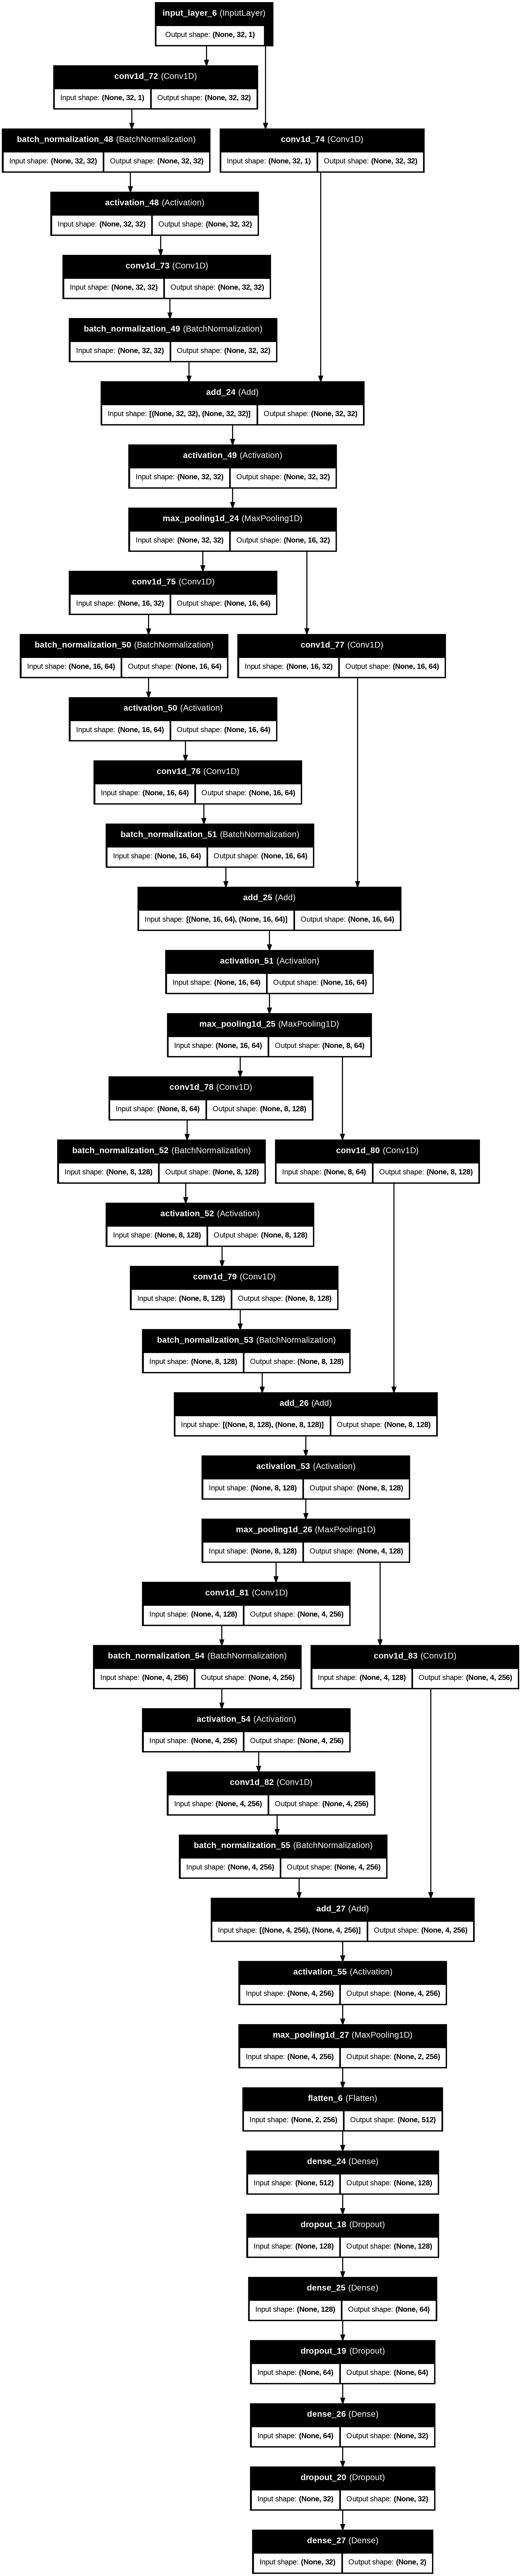

In [ ]:
from keras.layers import Input, Conv1D, BatchNormalization, MaxPooling1D, Flatten, Dense, Dropout, concatenate, Add, Activation
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import plot_model

# Input shape
input_shape = (X_train.shape[1], 1)

# Input layer
input_layer = Input(input_shape)

# Residual block function
def residual_block(x, filters, kernel_size, pool_size=2):
    shortcut = x
    conv = Conv1D(filters, kernel_size, padding='same', activation=None)(x)
    conv = BatchNormalization()(conv)
    conv = Activation('relu')(conv)
    conv = Conv1D(filters, kernel_size, padding='same', activation=None)(conv)
    conv = BatchNormalization()(conv)
    shortcut = Conv1D(filters, 1, padding='same', activation=None)(shortcut)  # Adjust dimensions
    x = Add()([shortcut, conv])
    x = Activation('relu')(x)
    x = MaxPooling1D(pool_size)(x)
    return x

# Build residual blocks
x = residual_block(input_layer, 32, 6)
x = residual_block(x, 64, 6)
x = residual_block(x, 128, 6)
x = residual_block(x, 256, 6)

# Global average pooling for better generalization
gap = Flatten()(x)

# Fully connected layers
dense1 = Dense(128, activation='relu')(gap)
drop1 = Dropout(0.25)(dense1)

dense2 = Dense(64, activation='relu')(drop1)
drop2 = Dropout(0.25)(dense2)

dense3 = Dense(32, activation='relu')(drop2)
drop3 = Dropout(0.25)(dense3)

# Output layer
output_layer = Dense(2, activation='softmax')(drop3)

# Build the model
model = Model(input_layer, output_layer)
model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model summary
model.summary()

# Plot the model architecture
plot_model(model, to_file='enhanced_model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
from tensorflow import keras

# Compile the model
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
# check points and early stopping
from keras.callbacks import ModelCheckpoint,EarlyStopping

model_name = "CNN"
filepath = "/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/EEG-Brain/AMIGO/Ideal/Model/Liking/History/" + model_name + "weights-improvement-{epoch:02d}-{accuracy:.4f}.keras"
print(filepath)
checkpoint = ModelCheckpoint(filepath, monitor='accuracy', verbose=1, save_best_only=True, mode='max')
es = EarlyStopping(monitor='accuracy', mode='max', verbose=1, patience=10)
callbacks_list = [es, checkpoint]

/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/EEG-Brain/AMIGO/Ideal/Model/Liking/History/CNNweights-improvement-{epoch:02d}-{accuracy:.4f}.keras


In [ ]:

# Train the model
H = model.fit(X_train, Y_train,
          batch_size=100,
          epochs=100,
          verbose=1,
          validation_data=(x_test, y_test),
          callbacks= callbacks_list)


Epoch 1/100
1773/1773 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6951 - loss: 0.5866
Epoch 1: accuracy improved from -inf to 0.73248, saving model to /content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/EEG-Brain/AMIGO/Ideal/Model/Liking/History/CNNweights-improvement-01-0.7325.keras
1773/1773 ━━━━━━━━━━━━━━━━━━━━ 33s 11ms/step - accuracy: 0.6951 - loss: 0.5866 - val_accuracy: 0.7709 - val_loss: 0.4471
Epoch 2/100
1773/1773 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8069 - loss: 0.4051
Epoch 2: accuracy improved from 0.73248 to 0.81882, saving model to /content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/EEG-Brain/AMIGO/Ideal/Model/Liking/History/CNNweights-improvement-02-0.8188.keras
1773/1773 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.8069 - loss: 0.4051 - val_accuracy: 0.8455 - val_loss: 0.3362
Epoch 3/100
1770/1773 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8563 - loss: 0.3203
Epoch 3: accuracy improved from 0.81882 to 0.86272, saving mode

In [ ]:

from keras.models import save_model

model.save("/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/EEG-Brain/AMIGO/Ideal/Model/Liking/model.h5")


In [ ]:
from keras.models import load_model

model_loaded = load_model("/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/EEG-Brain/AMIGO/Ideal/Model/Liking/model.h5")

In [ ]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=1)

# Print the test accuracy
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

1847/1847 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9713 - loss: 0.1217
Test Accuracy: 97.36%


In [ ]:
score = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

1847/1847 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9713 - loss: 0.1217
Test loss: 0.11515965312719345
Test accuracy: 0.9736183285713196


In [ ]:
from sklearn.metrics import accuracy_score

# Get model predictions
y_pred = model_loaded.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class predictions
y_true = np.argmax(y_test, axis=1)          # Convert one-hot encoded labels to class indices

# Compute accuracy for each class
class_accuracies = {}
for class_label in np.unique(y_true):
    indices = np.where(y_true == class_label)
    class_accuracy = accuracy_score(y_true[indices], y_pred_classes[indices])
    class_accuracies[class_label] = class_accuracy

# Print the test accuracies
for class_label, accuracy in class_accuracies.items():
    print(f'Test Accuracy for Class {class_label}: {accuracy * 100:.2f}%')

1847/1847 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step
Test Accuracy for Class 0: 95.10%
Test Accuracy for Class 1: 98.45%


In [ ]:

import pickle

# Specify the correct file path
history_file_path = '/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/EEG-Brain/AMIGO/Ideal/Model/Liking/History/history.pkl'

# Save the model history to the file
with open(history_file_path, 'wb') as file_pi:
    pickle.dump(H, file_pi)


In [ ]:
import pickle

# Correct path with file name and extension
history_filepath = '/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/EEG-Brain/AMIGO/Ideal/Model/Liking/History/history.pkl'

# Load the history from the file
with open(history_filepath, 'rb') as file:
    load_history = pickle.load(file)

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 50 variables whereas the saved optimizer has 98 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


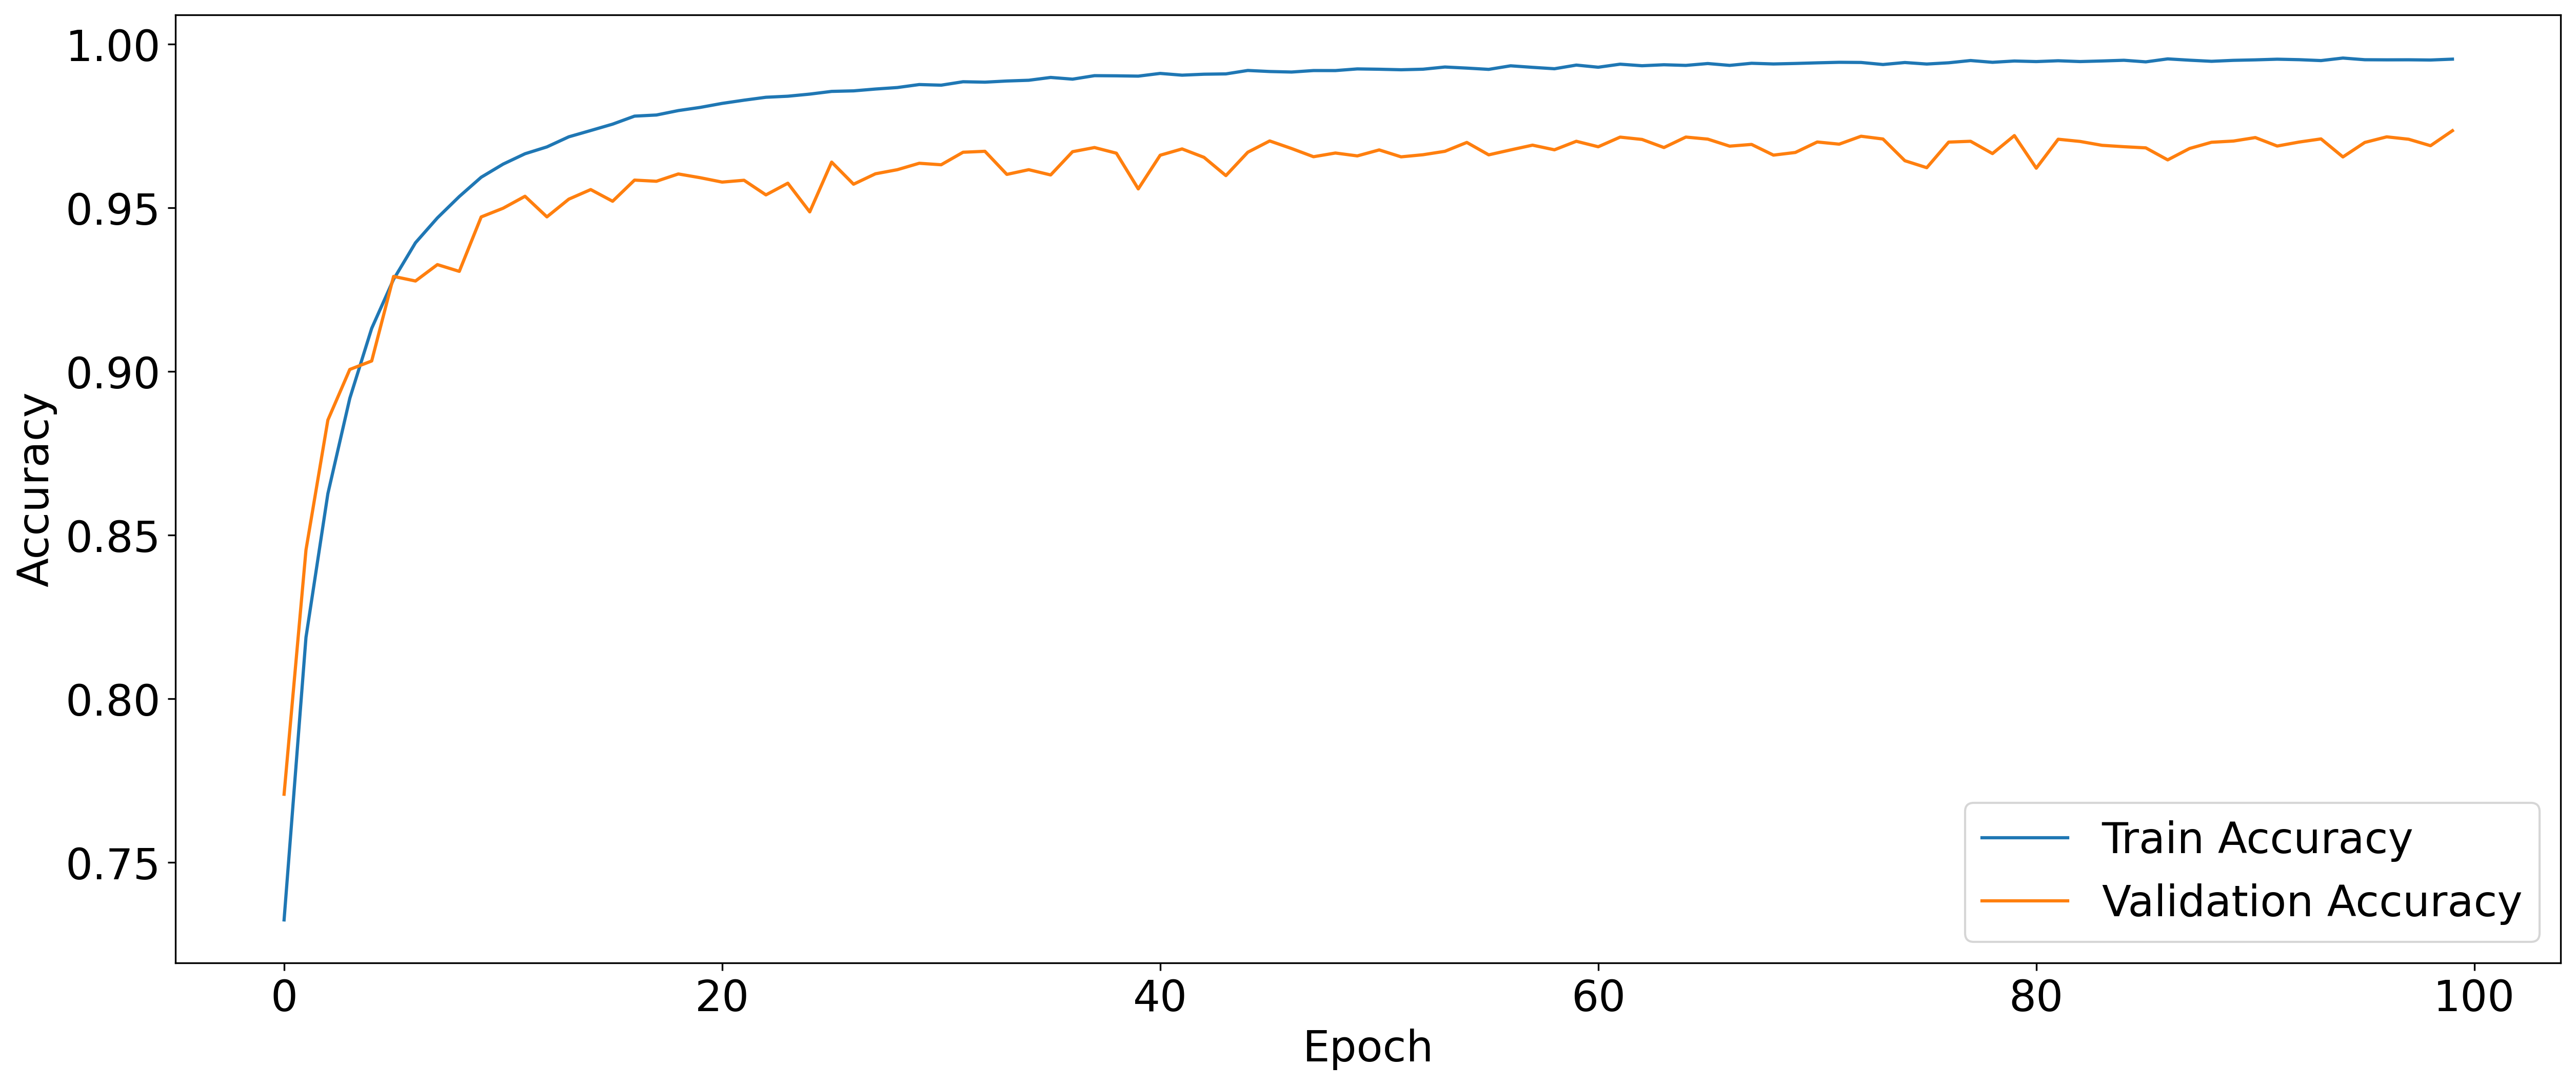

In [ ]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (20, 8)
plt.rcParams["font.size"] = 20

# Access accuracy and validation accuracy using the 'history' attribute
plt.plot(load_history.history['accuracy'], label='Train Accuracy')
plt.plot(load_history.history['val_accuracy'], label='Validation Accuracy')

#plt.title('CNN Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.show()

In [ ]:
from keras.models import load_model

model_loaded = load_model("/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/EEG-Brain/AMIGO/Ideal/Model/Liking/model.h5")

In [ ]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Define the number of bootstrap iterations
n_bootstraps = 10
confidence_level = 0.95

# Function to calculate confidence intervals
def calculate_confidence_interval(data, confidence=0.95):
    lower_percentile = (1 - confidence) / 2 * 100
    upper_percentile = (1 + confidence) / 2 * 100
    lower_bound = np.percentile(data, lower_percentile)
    upper_bound = np.percentile(data, upper_percentile)
    return lower_bound, upper_bound

# Perform bootstrap
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

for _ in range(n_bootstraps):
    # Resample with replacement from the test set
    indices = np.random.choice(range(len(x_test)), size=len(x_test), replace=True)
    x_resampled = x_test[indices]
    y_resampled = y_test[indices]

    # Make predictions on the resampled data
    predictions = model_loaded.predict(x_resampled)
    y_pred = np.argmax(predictions, axis=1)  # Convert to class labels if needed

    # Ensure y_resampled is also in label format (convert if necessary)
    if y_resampled.ndim > 1 and y_resampled.shape[1] > 1:  # If one-hot encoded
        y_resampled = np.argmax(y_resampled, axis=1)

    # Calculate metrics
    accuracy_scores.append(accuracy_score(y_resampled, y_pred))
    precision_scores.append(precision_score(y_resampled, y_pred, average='weighted'))
    recall_scores.append(recall_score(y_resampled, y_pred, average='weighted'))
    f1_scores.append(f1_score(y_resampled, y_pred, average='weighted'))

# Calculate confidence intervals
accuracy_ci = calculate_confidence_interval(accuracy_scores, confidence=confidence_level)
precision_ci = calculate_confidence_interval(precision_scores, confidence=confidence_level)
recall_ci = calculate_confidence_interval(recall_scores, confidence=confidence_level)
f1_ci = calculate_confidence_interval(f1_scores, confidence=confidence_level)

# Print results
print(f"Confidence interval for accuracy: {accuracy_ci[0]:.4f} - {accuracy_ci[1]:.4f}")
print(f"Confidence interval for precision: {precision_ci[0]:.4f} - {precision_ci[1]:.4f}")
print(f"Confidence interval for recall: {recall_ci[0]:.4f} - {recall_ci[1]:.4f}")
print(f"Confidence interval for F1 score: {f1_ci[0]:.4f} - {f1_ci[1]:.4f}")

1847/1847 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step
1847/1847 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step
1847/1847 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step
1847/1847 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step
1847/1847 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step
1847/1847 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step
1847/1847 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step
1847/1847 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step
1847/1847 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step
1847/1847 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step
Confidence interval for accuracy: 0.9729 - 0.9745
Confidence interval for precision: 0.9729 - 0.9744
Confidence interval for recall: 0.9729 - 0.9745
Confidence interval for F1 score: 0.9729 - 0.9744


In [ ]:
from keras.models import load_model

score = model_loaded.evaluate(x_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

1847/1847 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9713 - loss: 0.1217
Test loss: 0.11515965312719345
Test accuracy: 0.9736183285713196


In [ ]:
y_true = np.array(y_test)
y_pred = model_loaded.predict(x_test)

1847/1847 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


In [ ]:
y_pred = np.squeeze(y_pred)
y_pred = np.array(y_pred >= 0.5, dtype=int)  # Use 'int' instead of 'np.int'

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96     19208
           1       0.98      0.98      0.98     39886

   micro avg       0.97      0.97      0.97     59094
   macro avg       0.97      0.97      0.97     59094
weighted avg       0.97      0.97      0.97     59094
 samples avg       0.97      0.97      0.97     59094



1847/1847 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


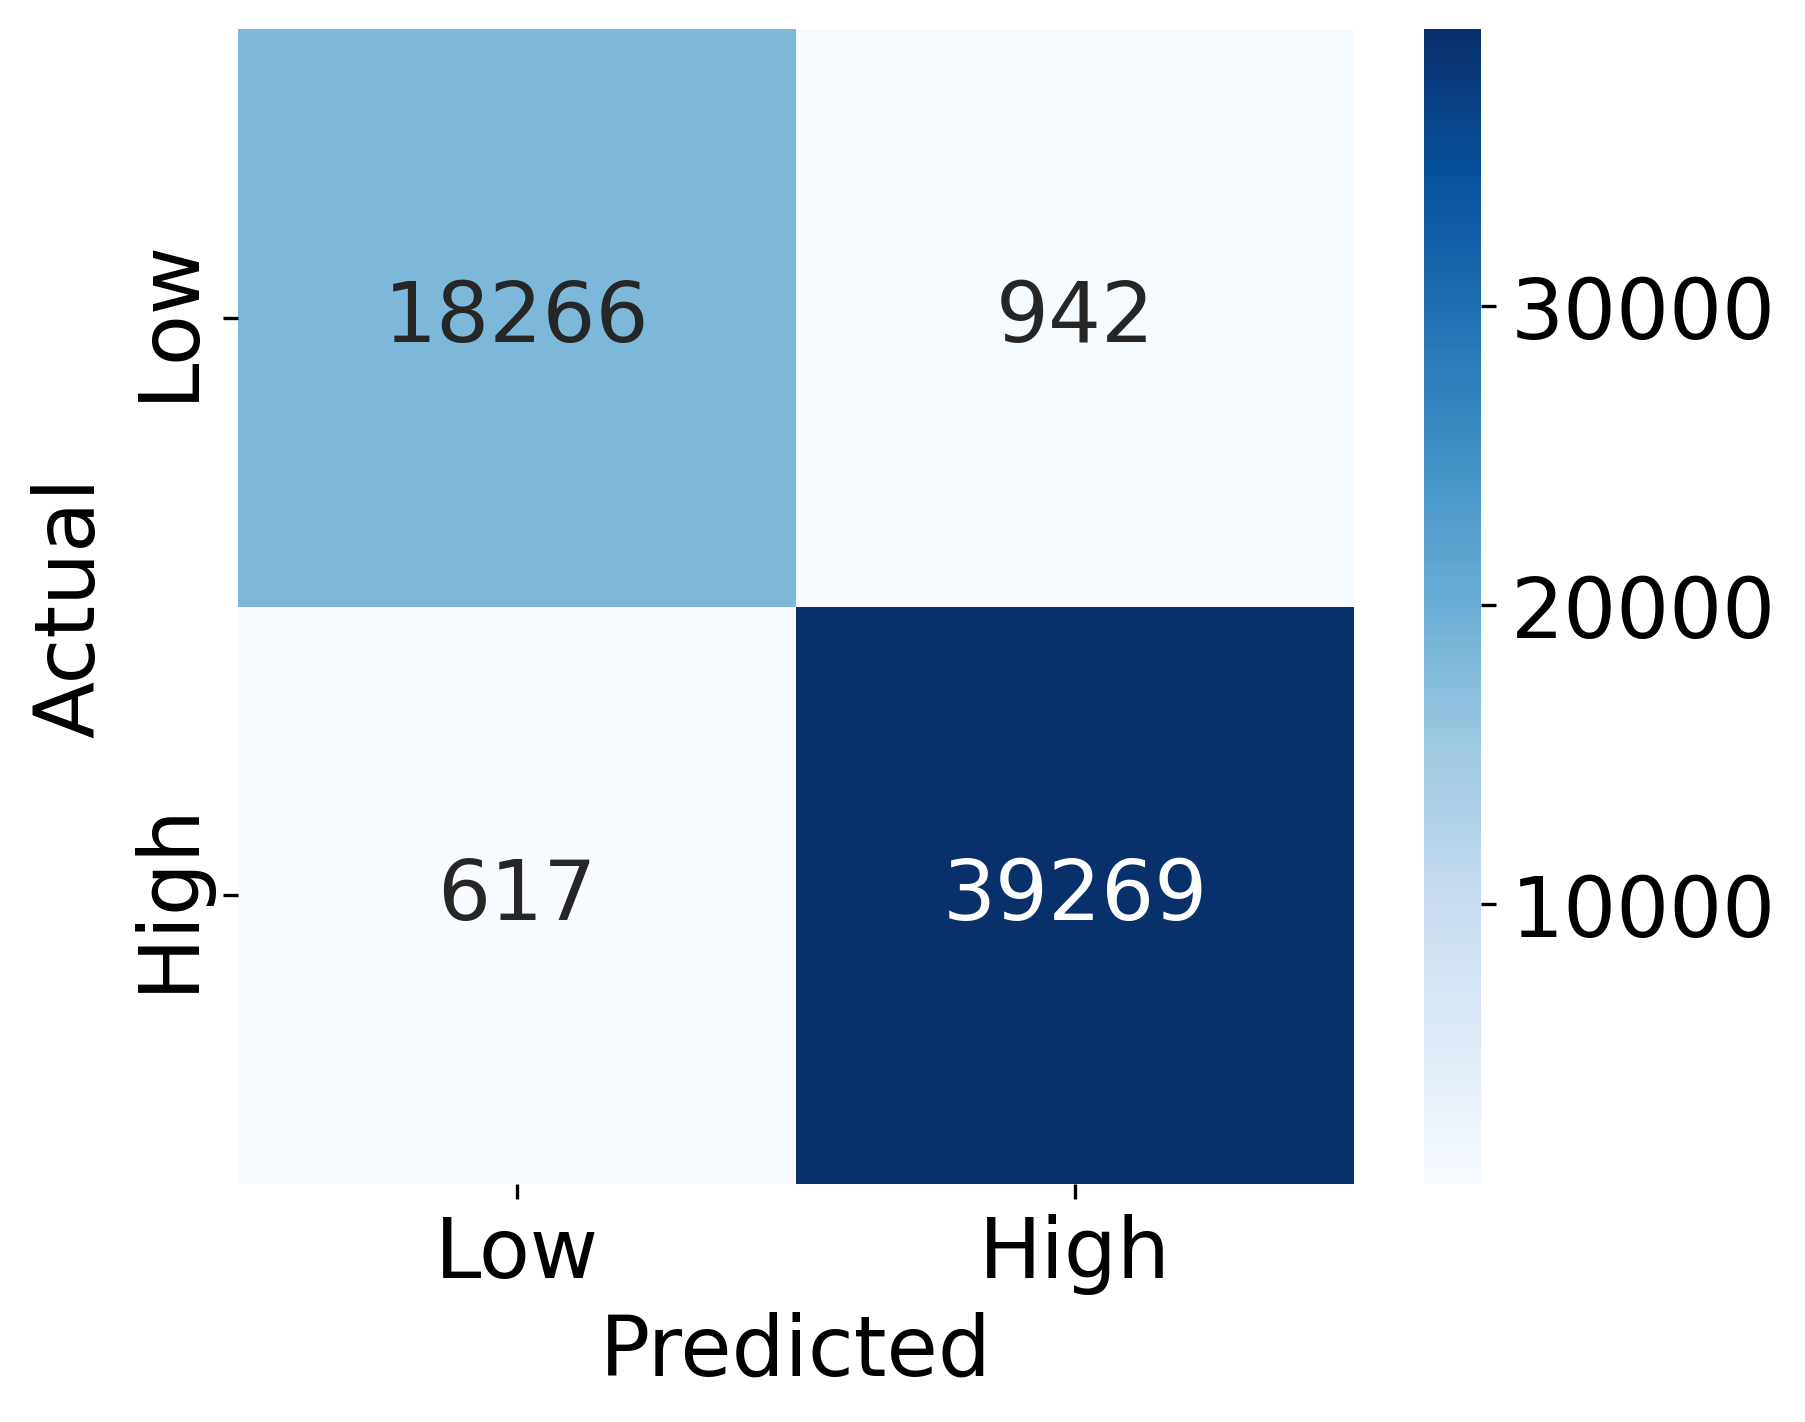

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming y_true and y_pred are already defined and possibly one-hot encoded
y_true = np.array(y_test)
y_pred = model_loaded.predict(x_test)

# If y_true or y_pred are one-hot encoded, flatten them
y_true = np.argmax(y_true, axis=1)  # Convert to label indices if one-hot encoded
y_pred = np.argmax(y_pred, axis=1)  # Convert to label indices if one-hot encoded

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix using Seaborn heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'High'], yticklabels=['Low', 'High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
# plt.title('Confusion Matrix')
plt.show()

1847/1847 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step


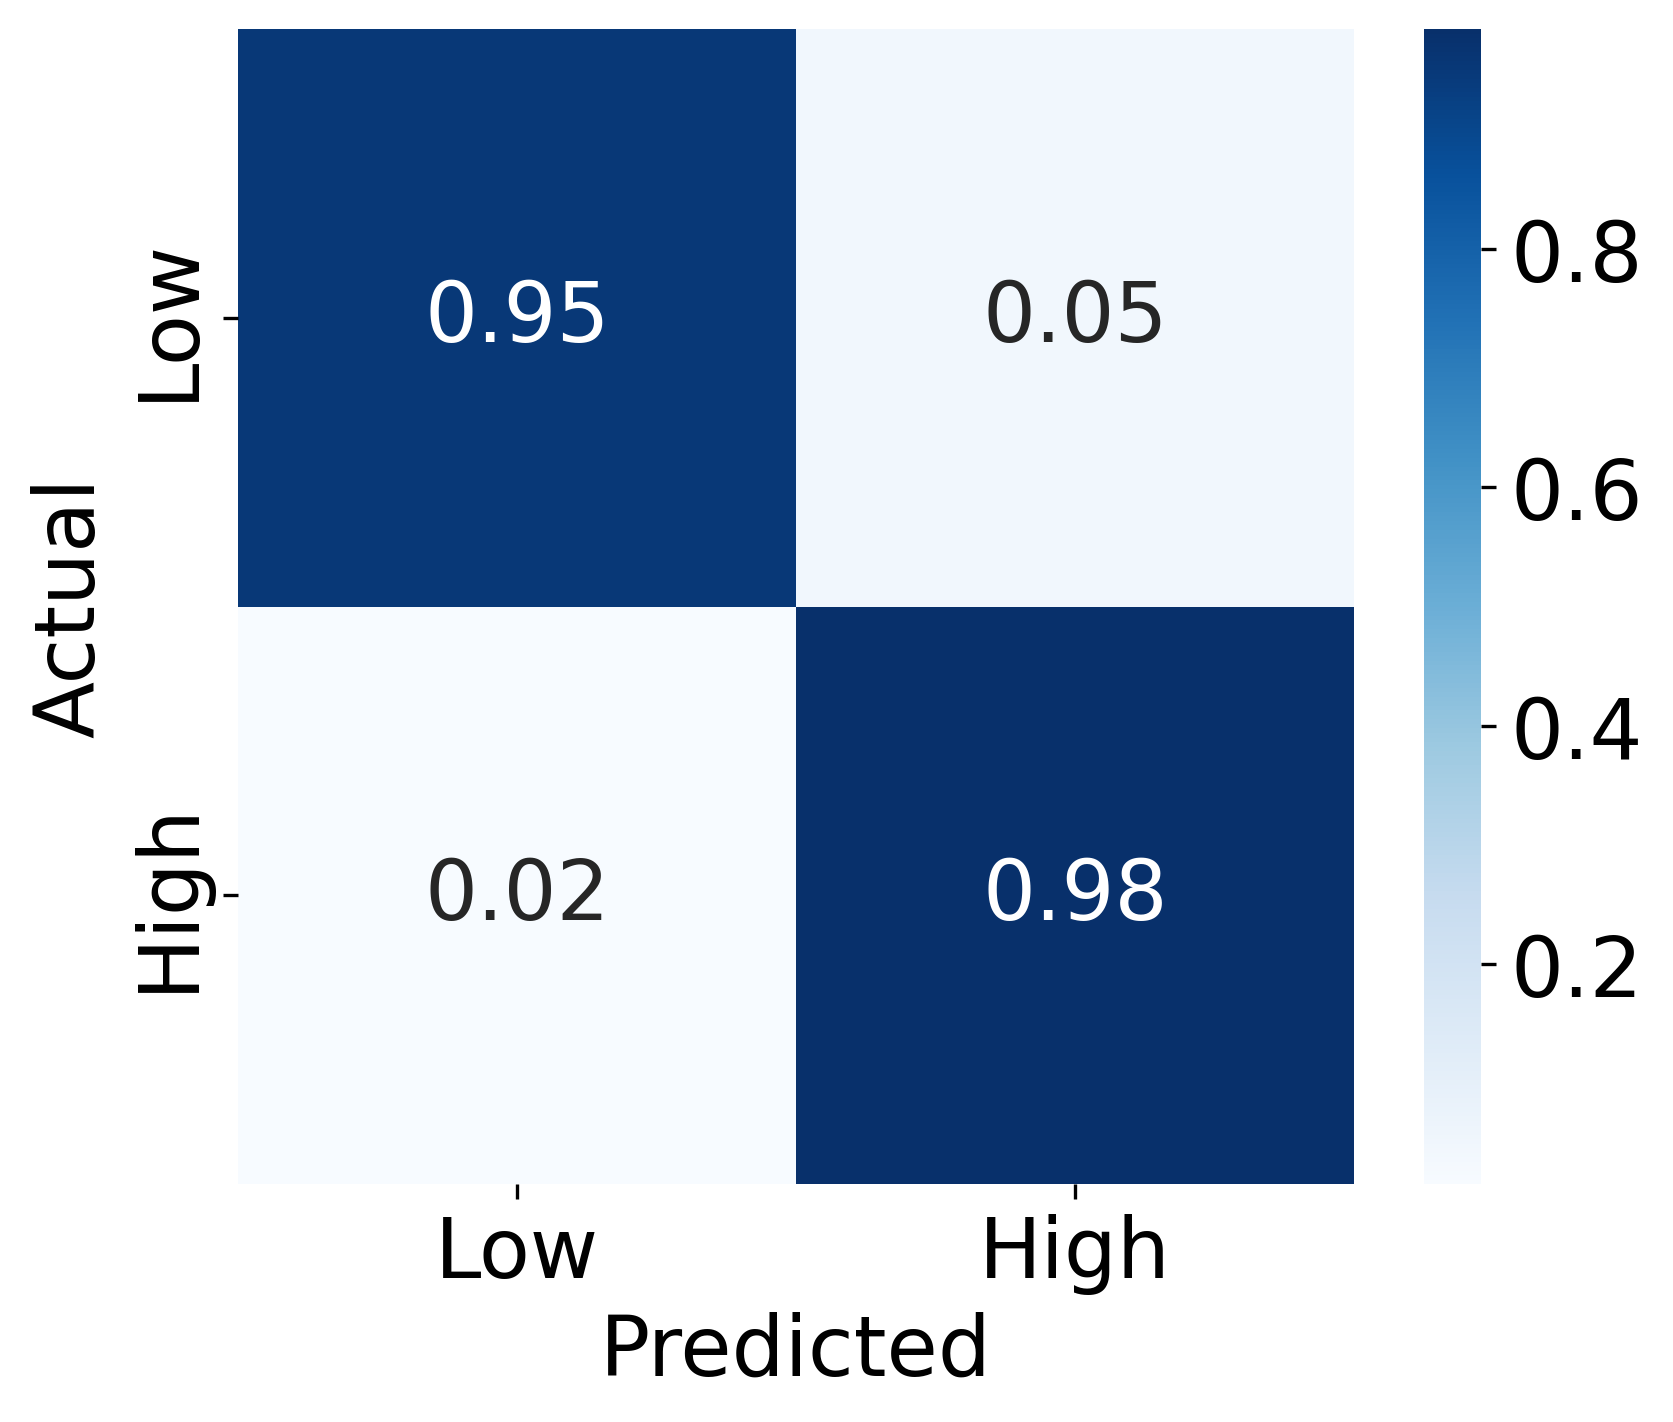

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming y_true and y_pred are already defined and possibly one-hot encoded
y_true = np.array(y_test)
y_pred = model_loaded.predict(x_test)

# If y_true or y_pred are one-hot encoded, flatten them
y_true = np.argmax(y_true, axis=1)  # Convert to label indices if one-hot encoded
y_pred = np.argmax(y_pred, axis=1)  # Convert to label indices if one-hot encoded

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Normalize the confusion matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plot normalized confusion matrix using Seaborn heatmap
plt.figure(figsize=(6, 5))
ax = sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues',
                 xticklabels=['Low', 'High'],
                 yticklabels=['Low', 'High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
#plt.title('Normalized Confusion Matrix')
plt.show()